#**Prediction of Cellular Composition Using Machine Learning and Deep Learning 🧬🤖**

**This project focuses on predicting cellular composition by leveraging state-of-the-art machine learning and deep learning techniques. Understanding cellular composition is critical in fields like biomedical research, drug discovery, and clinical diagnostics, as it provides insights into cellular behavior and functionality under various conditions.**

In [ ]:
#importing necessary libraries
import pandas as pd


In [ ]:
df = pd.read_csv('https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs909/protein_expression_data.csv')


In [ ]:
df['specimen_id']=df.VisSpot.apply(lambda x: x.split('-')[2]) #create specimen id field
df['image_id']=df.VisSpot.apply(lambda x: x.split('-')[2])+'_'+df.id #create image id field
df = df.set_index('image_id').sort_index()
protein_names = ['SMAa', 'CD11b',
       'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119',
       'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1',
       'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR',
       'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68',
       'CD14', 'KI67', 'CD16', 'SOX10']

In [ ]:
print(df)


          Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   
...              ...                    ...                ...   
D1_9x63         3609  CCTCCCGACAATCCCT-1-D1         123.760525   
D1_9x65          172  AACACGACTGTACTGA-1-D1          29.281573   
D1_9x67         2686  CACCGCCGACCAGCGA-1-D1         938.403662   
D1_9x69         2813  CAGAGTGATTTAACGT-1-D1         844.093656   
D1_9x71         6877  GTCAGTTGTGCTCGTT-1-D1         740.107483   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                    

In [ ]:
df.head(5)


Unnamed: 0                VisSpot  Location_Center_Y  \
image_id                                                         
A1_0x40          412  AAGTAAGCTTCCAAAC-1-A1         764.003658   
A1_0x42         7325  GTTTGAGCGGTTATGT-1-A1         799.511111   
A1_0x44         8102  TCACTCAGCGCATTAG-1-A1         832.902467   
A1_0x46         7085  GTGCGCTTACAAATGA-1-A1         858.343544   
A1_0x48         3748  CGAAGACTGCCCGGGA-1-A1         892.179831   

          Location_Center_X      SMAa     CD11b      CD44      CD31      CDK4  \
image_id                                                                        
A1_0x40          247.700528 -2.895476 -1.445686 -1.875972 -3.456108  0.461409   
A1_0x42          184.389514 -2.895476 -1.198798 -2.070174 -3.456108 -0.002521   
A1_0x44          109.598681 -2.895476 -1.631987 -1.920100 -3.456108  0.549366   
A1_0x46           42.981582 -2.895476 -1.922144 -1.941790 -3.456108  0.639180   
A1_0x48          958.319117 -2.895476 -0.579756 -2.300428 -3.456108  0.448388   

             YKL40  ...      DNA1      DNA3      MHCI      CD68      CD14  \
image_id            ...                                                     
A1_0x40  -0.437137  ...  0.935612  0.924488  0.015759 -0.587511 -1.114721   
A1_0x42  -0.501450  ... -0.089621 -0.068379  0.073487 -0.884354 -1.221040   
A1_0x44  -0.437258  ... -0.265247 -0.261404  0.258677 -1.300367 -1.227699   
A1_0x46  -0.414912  ... -0.223773 -0.211683  0.244109 -0.575592 -1.319719   
A1_0x48  -0.589094  ... -0.200982 -0.233761  0.068584 -0.517199 -1.228841   

              KI67      CD16     SOX10    id  specimen_id  
image_id                                                   
A1_0x40  -3.156091 -1.136758  0.748695  0x40           A1  
A1_0x42  -3.156091 -0.501517 -0.556429  0x42           A1  
A1_0x44  -2.919991 -0.555544  0.551475  0x44           A1  
A1_0x46  -3.156091 -0.300064 -0.127429  0x46           A1  
A1_0x48  -3.156091 -0.254002  0.808830  0x48           A1  

[5 rows x 44 columns]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9921 entries, A1_0x40 to D1_9x71
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9921 non-null   int64  
 1   VisSpot            9921 non-null   object 
 2   Location_Center_Y  9921 non-null   float64
 3   Location_Center_X  9921 non-null   float64
 4   SMAa               9921 non-null   float64
 5   CD11b              9921 non-null   float64
 6   CD44               9921 non-null   float64
 7   CD31               9921 non-null   float64
 8   CDK4               9921 non-null   float64
 9   YKL40              9921 non-null   float64
 10  CD11c              9921 non-null   float64
 11  HIF1a              9921 non-null   float64
 12  CD24               9921 non-null   float64
 13  TMEM119            9921 non-null   float64
 14  OLIG2              9921 non-null   float64
 15  GFAP               9921 non-null   float64
 16  VISTA              9

In [ ]:
any_null_rows = df.isnull().any(axis=1)
rows_with_any_nulls = df[any_null_rows]
print(rows_with_any_nulls)

Empty DataFrame
Columns: [Unnamed: 0, VisSpot, Location_Center_Y, Location_Center_X, SMAa, CD11b, CD44, CD31, CDK4, YKL40, CD11c, HIF1a, CD24, TMEM119, OLIG2, GFAP, VISTA, IBA1, CD206, PTEN, NESTIN, TCIRG1, CD74, MET, P2RY12, CD163, S100B, cMYC, pERK, EGFR, SOX2, HLADR, PDGFRa, MCT4, DNA1, DNA3, MHCI, CD68, CD14, KI67, CD16, SOX10, id, specimen_id]
Index: []

[0 rows x 44 columns]


**SINCE THERE ARE 0 ROWS WHERE PROTEIN EXPRESSION VALUES ARE NULL , SO THERE IS NO NEED TO DROP ANY IMAGE**

**Question No. 1: (Data Analysis) [15 Marks]
Using training data, answer the following questions:
i. Counting Examples: Determine the number of "examples" or spots present in each specimen. [2 marks]**


**ANSWER 1 . (i)   
THE NUMBER OF EXAMPLES IN EACH SPECIMEN AFTER APPLYING VALUE COUNTS COMES OUT TO BE C1-4129, A1-2894 ,D1-1753 AND B1-1145**

In [ ]:
df['specimen_id'].value_counts()

C1    4129
A1    2894
D1    1753
B1    1145
Name: specimen_id, dtype: int64

**ii. Protein Expression Histograms: For each specimen, generate histograms to visualize the expression values of 'NESTIN', 'cMYC', and 'MET' and discuss your observations. [3 marks]**

*ANSWER*

**(ii) IT WAS NOTED IN THAT ALL THE SPECIMENS , THE VALUES OF NESTIN PROTEIN EXPRESSIONS RANGED BETWEEN -1 AND 1 . SPECIFICALLY , HIGH FREQUENCY RANGES WERE FROM 0 TO 1 IN SPECIMEN A1 , IT WAS -1 TO 0 IN SPECIMEN B1 ,C1 AND D1 RESPECTIVELY.**

**MAXIMUM FREQUENCY RANGES BETWEEN 0 TO 1 IN CASE OF ALL SPECIMENS A1 TO D1,IN CASE OF cMYC PROTEIN.**

**MAXIMUM FREQUENCY RANGES BETWEEN -1 TO 0 IN CASE OF SPECIMENS A1 AND B1 WHEREAS MAXIMUM FREQUENCY VALUES  RANGE BETWEEN 0 TO 1 IN CASE OF SPECIMENS C1 AND D1 FOR 'MET' PROTEIN EXPRESSION.**




**VARIOUS HISTOGRAMS FOR DIFFERENT SPECIMEN IDS FOR PROTEIN EXPRESSIONS LIKE 'NESTIN' , 'cMYC' AND 'MET'**

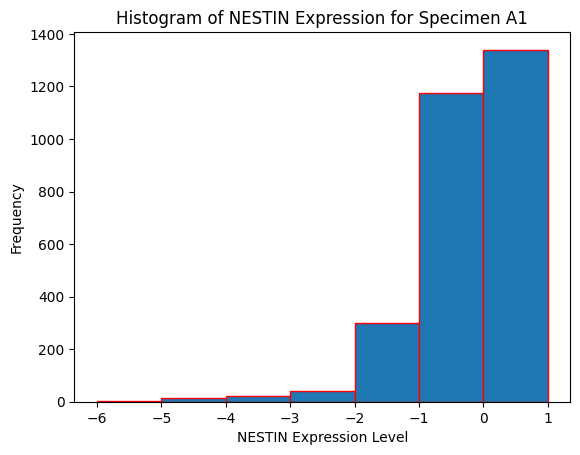

In [ ]:
import matplotlib.pyplot as plt
bins_nestin=[-6,-5,-4,-3,-2,-1,0,1]
nestin_a1 = df[df['specimen_id'] == 'A1']['NESTIN']
plt.hist(nestin_a1,bins=bins_nestin,edgecolor='red')
plt.xlabel('NESTIN Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of NESTIN Expression for Specimen A1')

# Show the plot
plt.show()


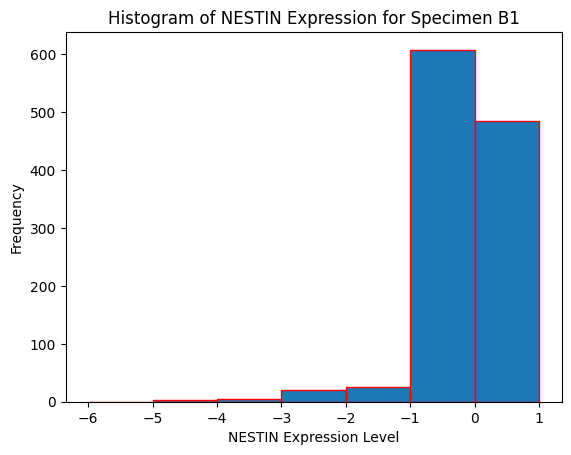

In [ ]:
nestin_b1 = df[df['specimen_id'] == 'B1']['NESTIN']
plt.hist(nestin_b1,bins=bins_nestin,edgecolor='red')
plt.xlabel('NESTIN Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of NESTIN Expression for Specimen B1')

plt.show()

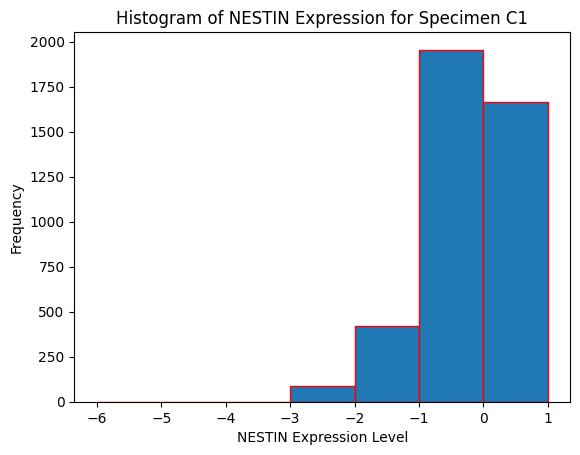

In [ ]:
nestin_c1 = df[df['specimen_id'] == 'C1']['NESTIN']
plt.hist(nestin_c1,bins=bins_nestin,edgecolor='red')
plt.xlabel('NESTIN Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of NESTIN Expression for Specimen C1')

plt.show()

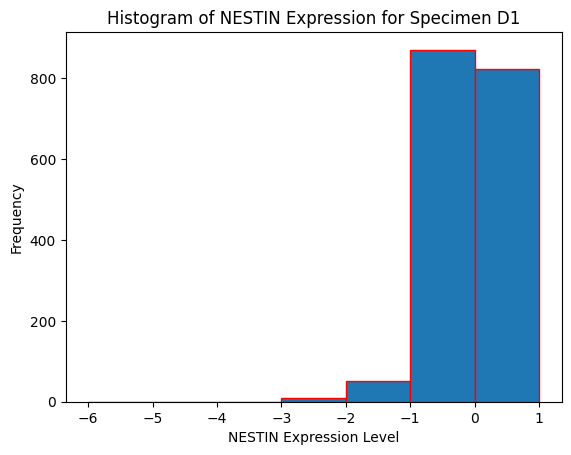

In [ ]:
nestin_d1 = df[df['specimen_id'] == 'D1']['NESTIN']
plt.hist(nestin_d1,bins=bins_nestin,edgecolor='red')
plt.xlabel('NESTIN Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of NESTIN Expression for Specimen D1')

plt.show()

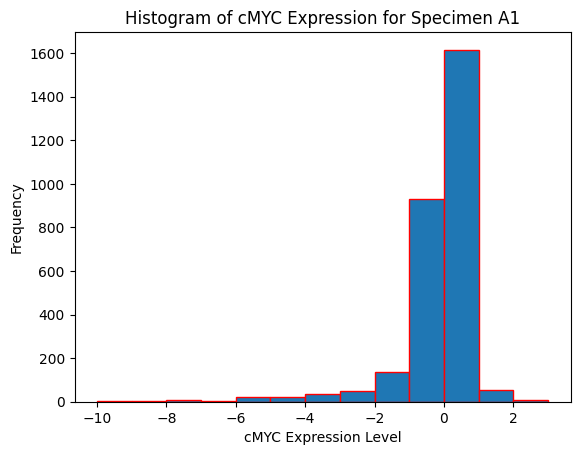

In [ ]:
bins_cmyc=[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
cmyc_a1 = df[df['specimen_id'] == 'A1']['cMYC']
plt.hist(cmyc_a1,bins=bins_cmyc,edgecolor='red')
plt.xlabel('cMYC Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of cMYC Expression for Specimen A1')

plt.show()

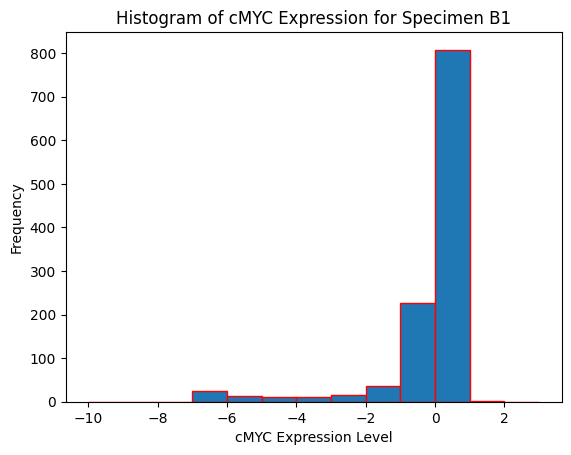

In [ ]:
cmyc_b1 = df[df['specimen_id'] == 'B1']['cMYC']
plt.hist(cmyc_b1,bins=bins_cmyc,edgecolor='red')
plt.xlabel('cMYC Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of cMYC Expression for Specimen B1')

plt.show()

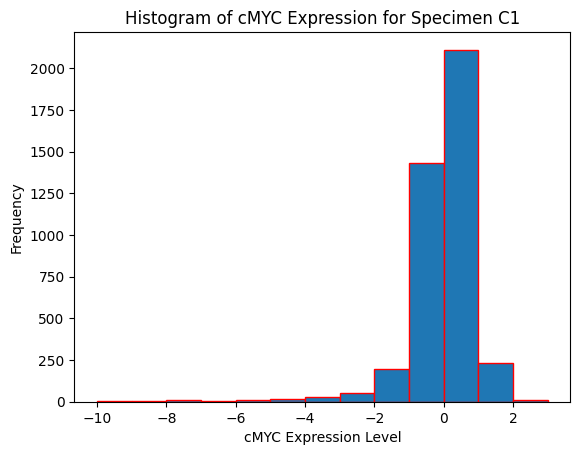

In [ ]:
cmyc_c1 = df[df['specimen_id'] == 'C1']['cMYC']
plt.hist(cmyc_c1,bins=bins_cmyc,edgecolor='red')
plt.xlabel('cMYC Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of cMYC Expression for Specimen C1')

plt.show()

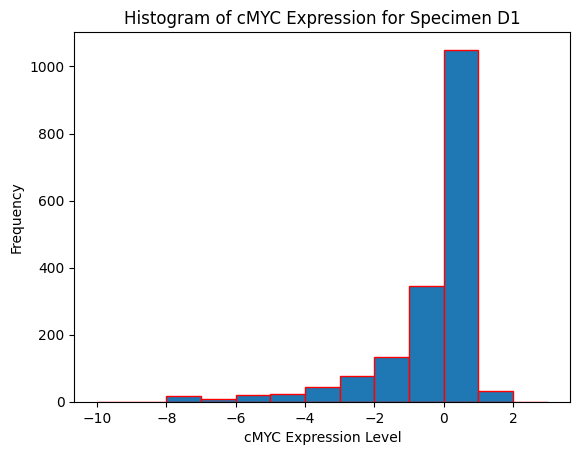

In [ ]:
cmyc_d1 = df[df['specimen_id'] == 'D1']['cMYC']
plt.hist(cmyc_d1,bins=bins_cmyc,edgecolor='red')
plt.xlabel('cMYC Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of cMYC Expression for Specimen D1')

plt.show()

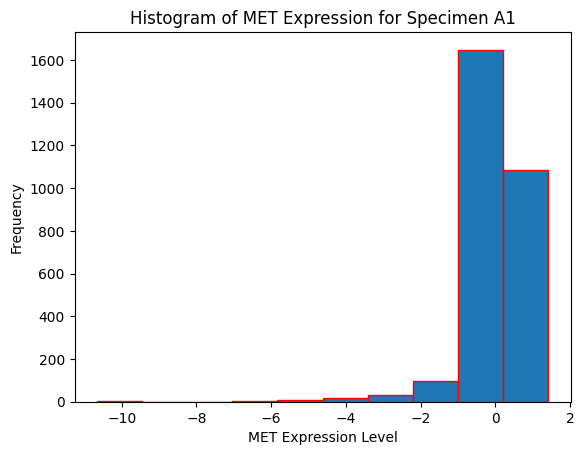

In [ ]:
met_a1 = df[df['specimen_id'] == 'A1']['MET']
plt.hist(met_a1,edgecolor='red')
plt.xlabel('MET Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of MET Expression for Specimen A1')

plt.show()

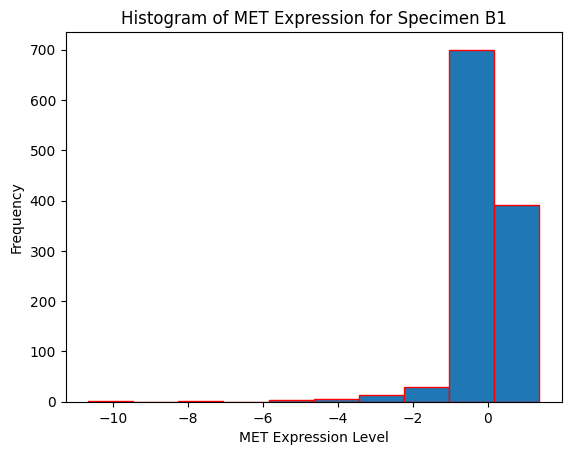

In [ ]:
met_b1 = df[df['specimen_id'] == 'B1']['MET']
plt.hist(met_b1,edgecolor='red')
plt.xlabel('MET Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of MET Expression for Specimen B1')

plt.show()

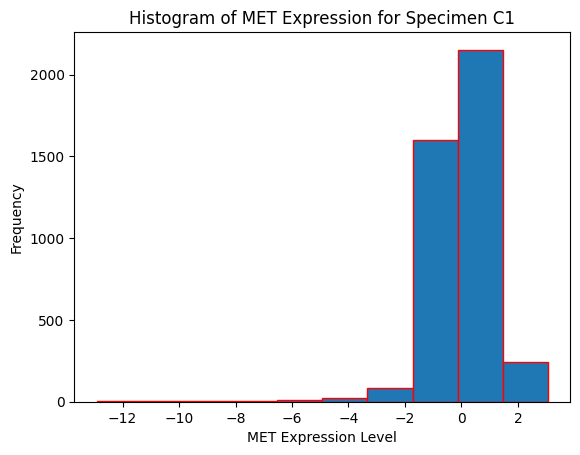

In [ ]:
met_c1 = df[df['specimen_id'] == 'C1']['MET']
plt.hist(met_c1,edgecolor='red')
plt.xlabel('MET Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of MET Expression for Specimen C1')

plt.show()

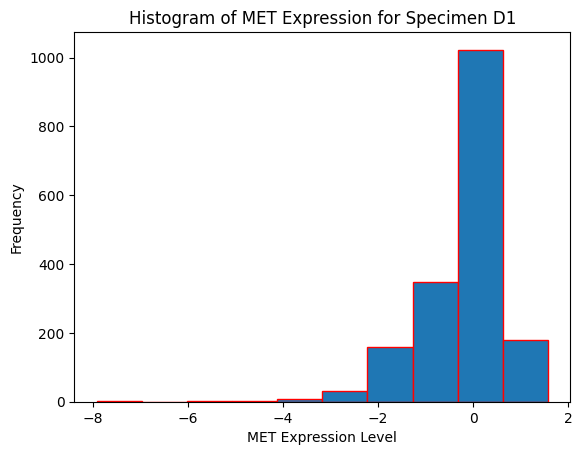

In [ ]:
met_d1 = df[df['specimen_id'] == 'D1']['MET']
plt.hist(met_d1,edgecolor='red')
plt.xlabel('MET Expression Level')
plt.ylabel('Frequency')
plt.title('Histogram of MET Expression for Specimen D1')

plt.show()

In [ ]:
image_folder = '/content/az/patches_256/'


In [ ]:
#importing necessary libraries to work with the images and access glob , a library asked in the assignemnt to access images
import glob
from skimage import io
from skimage.color import rgb2hed
import matplotlib.pyplot as plt
import numpy as np

**iii. Image Pre-processing: Convert a selection of images from RGB to HED color space, focusing on the Hematoxylin channel (H) to highlight cellular nuclei. Provide visual examples and follow the hints in the provided notebook. [5 marks]**

**ANSWER (iii) PICTURES HAVE BEEN CONVERTED FROM RGBA TO RGB AND THEN TO HED SPACE AND VISUAL EXAMPLES HAVE BEEN SHOWN BELOW AND FURTHER FOCUS HAS BEEN PUT ON THE H CHANNEL TO HIGHLIGHT CELLULAR NUCLEI.**


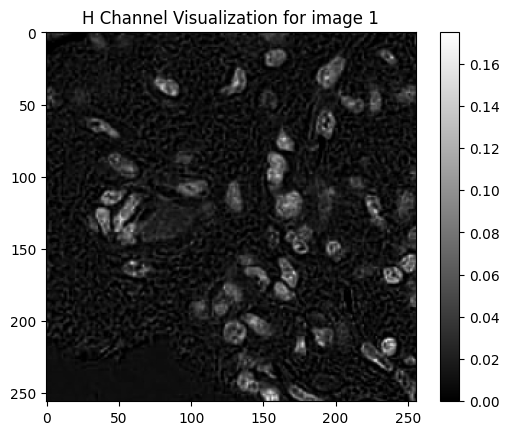

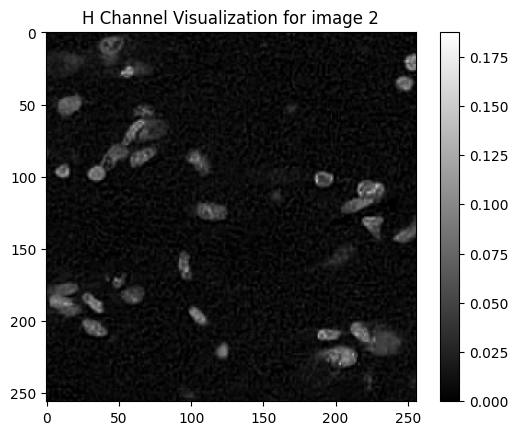

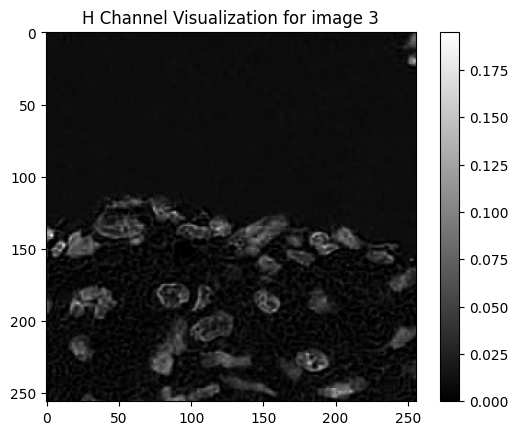

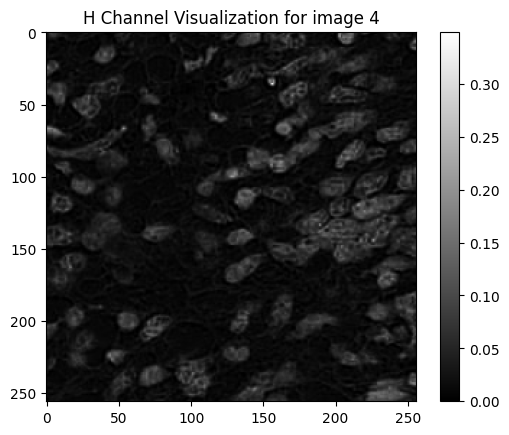

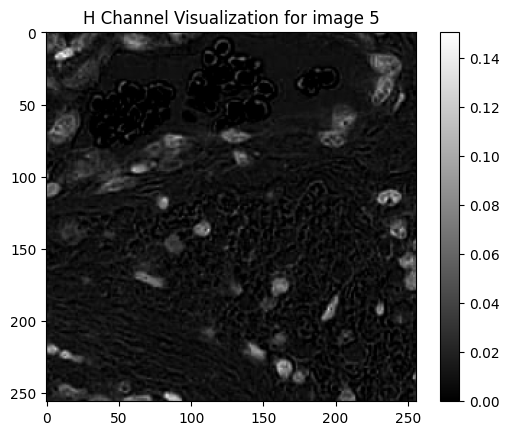

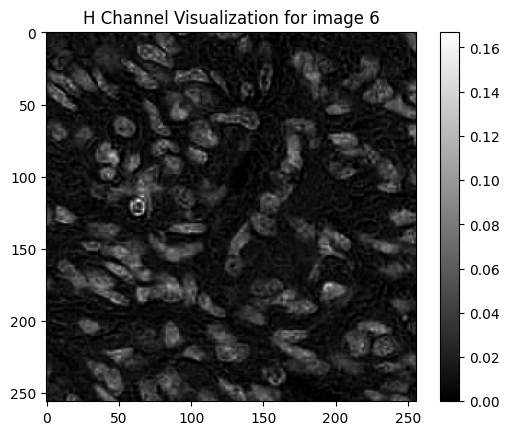

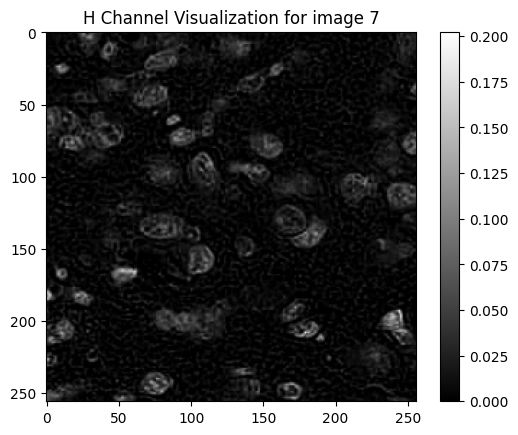

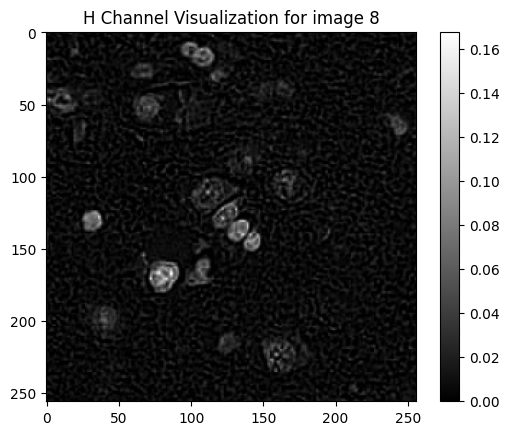

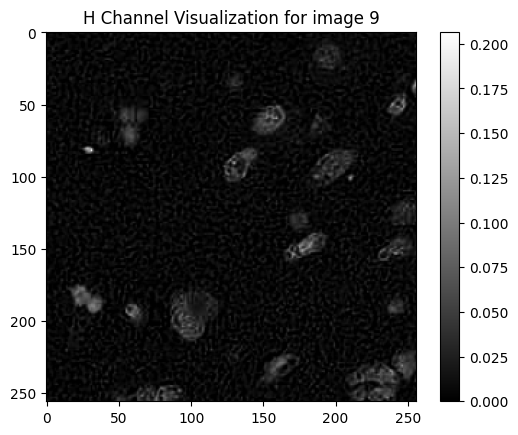

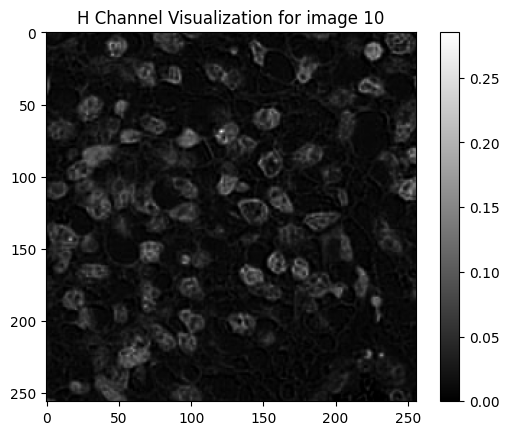

In [ ]:
image_files = glob.glob(image_folder + '*.png')
#accesing first 10 images as selection of some images is mentioned in assignment
c=0
for image_file in image_files[:10]:
    image = io.imread(image_file)
    if image.shape[2] == 4:
        image = image[:, :, :3]
    hed_image = rgb2hed(image)
    h_channel = hed_image[:, :, 0]
    c+=1
    # Visualising the H channel
    plt.imshow(h_channel, cmap='gray')
    plt.colorbar()
    plt.title('H Channel Visualization for image '+ str(c))
    plt.show()

**iv. H-channel Analysis: Calculate the average intensity of the H-channel for each image. Create a scatter plot comparing these averages against the expression levels of NESTIN for each image. Assess the correlation between H-channel intensity and NESTIN expression. Discuss the potential of H-channel average as a predictive feature for NESTIN expression. [4 marks]**


**ANSWER : SINCE THERE ARE 12156 IMAGES IN THE IMAGES FOLDER AND OUR DATASET CONTAINS 9921 IMAGES , WE NEED TO EXTRACT ONLY THOSE IMAGES FOR WHICH THE IMAGE ID MATCHES IN THE DATAFRAME . AFTER DOING THIS STEP LENGTH OF df['NESTIN'] and h_channel_averages which IS A LIST CONTAINING ALL THE H CHANNEL VALUES OF ALL IMAGES BECOMES EQUAL THAT IS 9921 , WE CREATE A SCATTER PLOT WHICH HAS BEEN DISPLAYED BELOW.**

In [ ]:
import glob
from skimage import io
from skimage.color import rgb2hed
import numpy as np


# List to store the average H channel intensity values, but only for images corresponding to image IDs in the DataFrame's index
h_channel_averages = []

# Extracting unique image IDs from the DataFrame's index
unique_image_ids = df.index.unique()

# Assuming image filenames correlate directly with the image IDs in the index
for image_id in unique_image_ids:
    image_file = f"{image_folder}{image_id}.png"

    # Using glob to check if the file exists to prevent errors
    matched_files = glob.glob(image_file)
    if matched_files:
        image = io.imread(matched_files[0])

        # Ensuring the image is RGB
        if image.ndim == 3 and image.shape[2] == 4:  # If RGBA, convert to RGB
            image = image[:, :, :3]

        # Converting the image to HED space and extracting the H channel
        hed_image = rgb2hed(image)
        h_channel = hed_image[:, :, 0]

        # Calculating and storing the average intensity of the H channel
        average_intensity = np.mean(h_channel)
        h_channel_averages.append(average_intensity)



In [ ]:
len(h_channel_averages)

9921

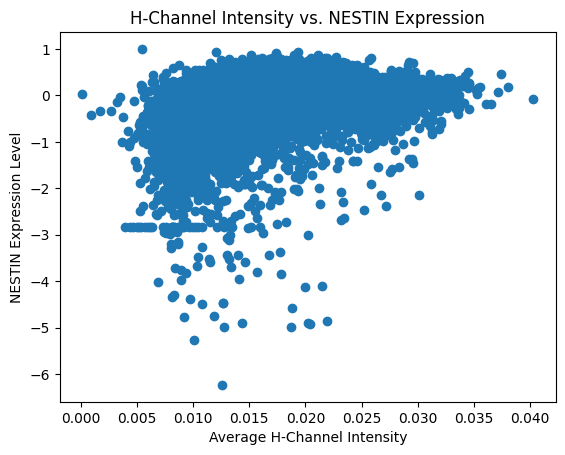

In [ ]:
plt.scatter(h_channel_averages, df['NESTIN'])
plt.xlabel('Average H-Channel Intensity')
plt.ylabel('NESTIN Expression Level')
plt.title('H-Channel Intensity vs. NESTIN Expression')
plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(h_channel_averages, df['NESTIN'])

print(f"Correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.3703852739487269
P-value: 3.2954e-320


**Moderate Correlation: A correlation coefficient of 0.370 indicates a moderate positive linear relationship, meaning that as the H-channel intensity increases, the NESTIN expression tends to increase as well.**

**Statistical Significance: The p-value is very small (far less than 0.05), indicating strong evidence against the null hypothesis of no correlation. Thus, we can say with high confidence that there is a statistically significant correlation between H-channel intensity and NESTIN expression.**

**Scatter Plot Analysis: In the scatter plot, you can see the trend that supports the positive correlation. However, there is a wide spread of the data points, which indicates variability that is not captured by the linear relationship alone.**

**(V)**

**Performance Metrics for Prediction: Discuss suitable performance metrics for predicting protein expression from images. Identify the most appropriate metric for this specific problem and justify your choice. [3 marks]**


**ANSWER**

**REGRESSION METRICS**


Mean Squared Error (MSE):
MSE is the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE gives a rough idea of the magnitude of the error. It heavily penalizes larger errors since it squares the deviations.

Mean Absolute Error (MAE):
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

Root Mean Squared Error (RMSE):
RMSE is the square root of the mean of the square of all of the error. It's similar to MSE, but the root means that it is in the same units as the response variable. This makes it more interpretable as it's on the same scale as the original data.

R² Score (Coefficient of Determination):
R² score represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. It's a statistic that will give some information about the goodness of fit of a model. An R² of 1 indicates that the regression predictions perfectly fit the data.

Adjusted R² Score:
Adjusted R² score is similar to R², but it adjusts for the number of variables included in the model. This metric is important because it accounts for the phenomenon where the R² will not decrease as more variables are added to the model, regardless of the usefulness of those variables.

Choosing the Right Metric for Predicting Protein Expression:

For predicting protein expression from images, a nuanced approach is important:

If the priority is to penalize large errors more (which might be important in experimental settings where large prediction errors could lead to significant consequences), RMSE would be a strong choice.

If all errors are to be weighted equally, MAE would be appropriate.

R² or Adjusted R² are useful if we want to understand the proportion of variance explained by the model, with Adjusted R² providing a more accurate representation if we have many predictors.


Given that protein expression levels can vary greatly and the relationship between features extracted from images and expression levels might be complex and nonlinear, RMSE might be hypothesized to be a better metric because it would reflect both the average error and the presence of large errors in prediction. Moreover, if the model includes several predictors, Adjusted R² would be beneficial to assess the model's explanatory power while accounting for the number of predictors. Therefore, using both RMSE and Adjusted R² could provide a comprehensive view of the model's performance.

**ANSWER 2**



**1. Calculate the average and variance for each of the 'H' (from HED), red, green, and blue channels.**

**Average and variance of each of the 'H' (from HED), red, green, and blue channels is given below.**

In [ ]:
image_folder = '/content/az/patches_256/'

In [ ]:
import glob
from skimage import io
from skimage.color import rgb2hed
import numpy as np



# Lists to store the average intensity values and variances for the H channel and RGB channels
h_channel_averages, h_channel_variances = [], []
r_channel_averages, r_channel_variances = [], []
g_channel_averages, g_channel_variances = [], []
b_channel_averages, b_channel_variances = [], []

# Extracting unique image IDs from the DataFrame's index
unique_image_ids = df.index.unique()

for image_id in unique_image_ids:
    image_file = f"{image_folder}{image_id}.png"

    # Using glob to find the image file
    matched_files = glob.glob(image_file)
    if matched_files:
        image = io.imread(matched_files[0])

        # Converting to RGB if the image is RGBA
        if image.ndim == 3 and image.shape[2] == 4:
            image = image[:, :, :3]

        # Converting the image to HED space for the H channel
        hed_image = rgb2hed(image)
        h_channel = hed_image[:, :, 0]

        # Calculating and storing the average intensity and variance of each channel
        h_channel_averages.append(np.mean(h_channel))
        h_channel_variances.append(np.var(h_channel))

        for i in range(3):
            channel_data = image[:, :, i]
            if i == 0:  # Red channel
                r_channel_averages.append(np.mean(channel_data))
                r_channel_variances.append(np.var(channel_data))
            elif i == 1:  # Green channel
                g_channel_averages.append(np.mean(channel_data))
                g_channel_variances.append(np.var(channel_data))
            elif i == 2:  # Blue channel
                b_channel_averages.append(np.mean(channel_data))
                b_channel_variances.append(np.var(channel_data))

In [ ]:
len(g_channel_variances)

9921

In [ ]:
features_df = pd.DataFrame({
    'h_mean': h_channel_averages,
    'h_variance': h_channel_variances,
    'r_mean': r_channel_averages,
    'r_variance': r_channel_variances,
    'g_mean': g_channel_averages,
    'g_variance': g_channel_variances,
    'b_mean': b_channel_averages,
    'b_variance': b_channel_variances
}, index=df.index)

**The values of all the average and variance for each of the 'H' (from HED), red, green, and blue channels is stored in features_df and first 5 values of it are shown using features_df.head() below**

In [ ]:
features_df.head(5)

h_mean  h_variance      r_mean   r_variance      g_mean  \
image_id                                                              
A1_0x40   0.013534    0.000378  216.465088  1036.697084  181.384338   
A1_0x42   0.015797    0.000390  202.116943  1238.317440  134.284088   
A1_0x44   0.015550    0.000353  199.589981  1113.058218  122.246490   
A1_0x46   0.017684    0.000379  192.781448  1160.145549  108.201324   
A1_0x48   0.017878    0.000430  191.433960  1232.698855  102.946701   

           g_variance      b_mean   b_variance  
image_id                                        
A1_0x40   3085.239949  210.042633  1353.047560  
A1_0x42   2592.018446  183.336899  1287.601511  
A1_0x44   1905.673801  177.482666   962.546605  
A1_0x46   1621.589443  168.975937   875.956590  
A1_0x48   1506.591443  165.239868   853.712849

**Dividing data into training and test data**

In [ ]:
train_mask = df['specimen_id'].str.startswith(('A1', 'B1', 'D1'))
test_mask = df['specimen_id'].str.startswith('C1')
training_df = df[train_mask]
testing_df = df[test_mask]
print("Training DataFrame size:", training_df.shape)
print("Testing DataFrame size:", testing_df.shape)

Training DataFrame size: (5792, 44)
Testing DataFrame size: (4129, 44)


**REMOVING CATEGORICAL COLUMNS AS WE HAVE TO PERFORM REGRESSION TASKS AND ALSO DO SCALING**

In [ ]:
categorical_columns = training_df.select_dtypes(include=['object']).columns
training_df_numeric = training_df.drop(columns=categorical_columns)
testing_df_numeric = testing_df.drop(columns=categorical_columns)


In [ ]:
testing_df_numeric.to_csv('data_training_numeric',index= True)

In [ ]:
categorical_columns

Index(['VisSpot', 'id', 'specimen_id'], dtype='object')

 **(a) APPLYING STANDARD SCALING ON DATA AS WE HAVE TO PERFORM PCA AND OTHER DIMENSIONALITY REDUCTION TECHNIQUES**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(training_df_numeric.drop('NESTIN', axis=1))
X_test_scaled = scaler.transform(testing_df_numeric.drop('NESTIN', axis=1))

y_train = training_df_numeric['NESTIN']
y_test = testing_df_numeric['NESTIN']

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

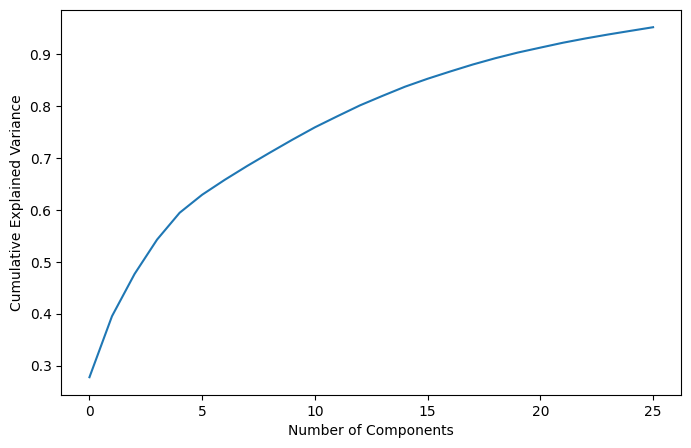

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

THIS SCREE GRAPH SHOWS THAT THE IDEAL NUMBER OF COMPONENTS TO TAKE INTO ACCOUNT FOR REGRESSION ANALYSIS SHOULD BE 10 .

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr


**CREATING SCATTER PLOTS FOR PCA FEATURES AND NESTIN**

RMSE: 0.4975321410928859
R2 Score: 0.4348939854787479


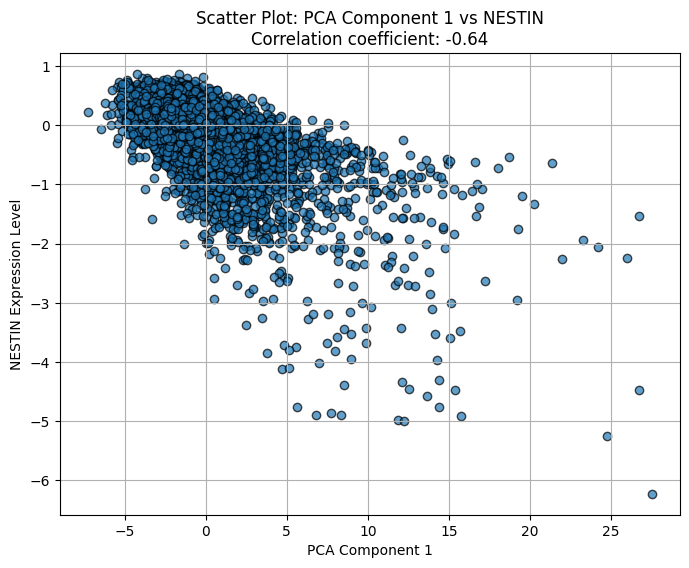

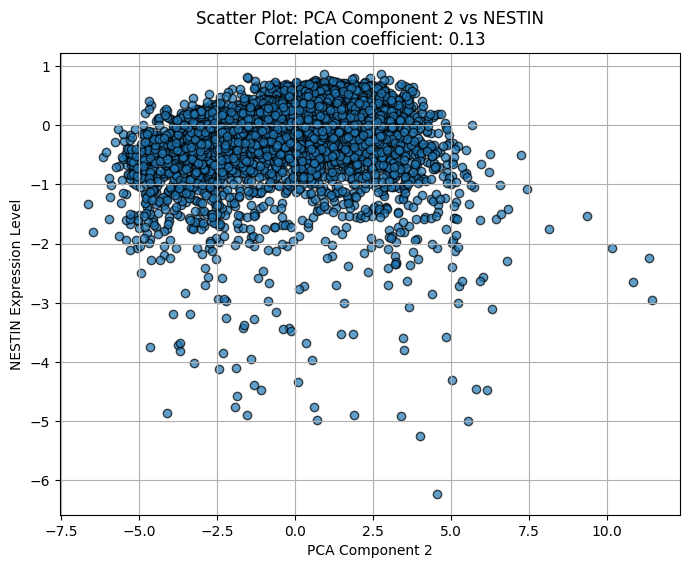

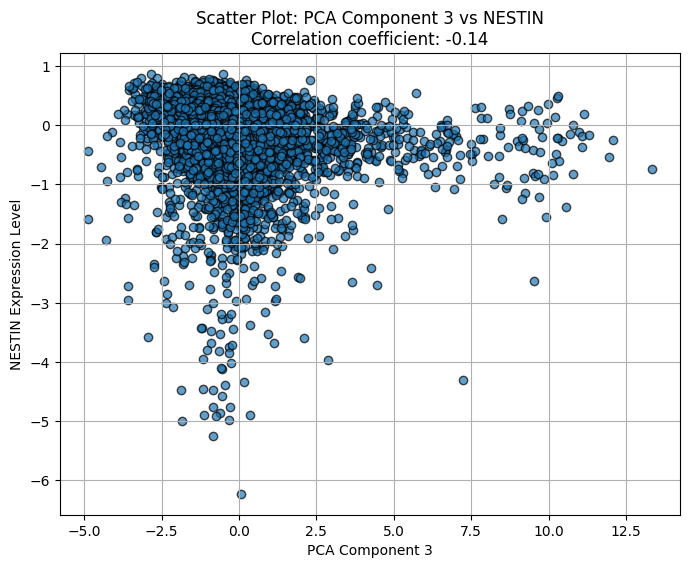

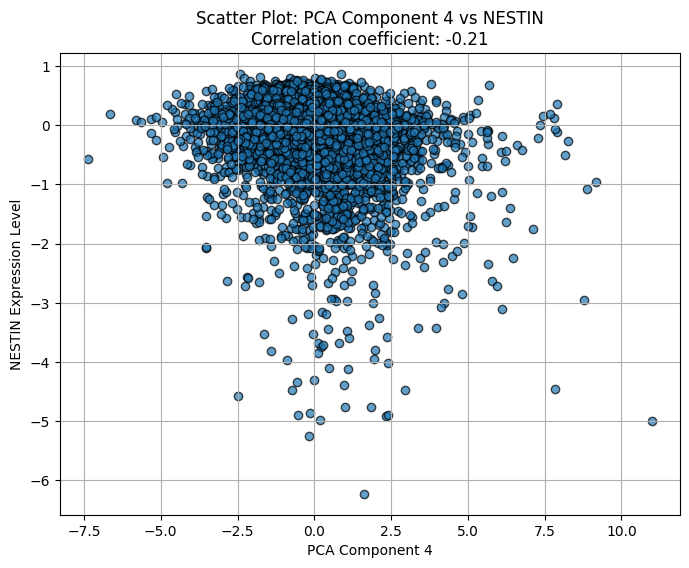

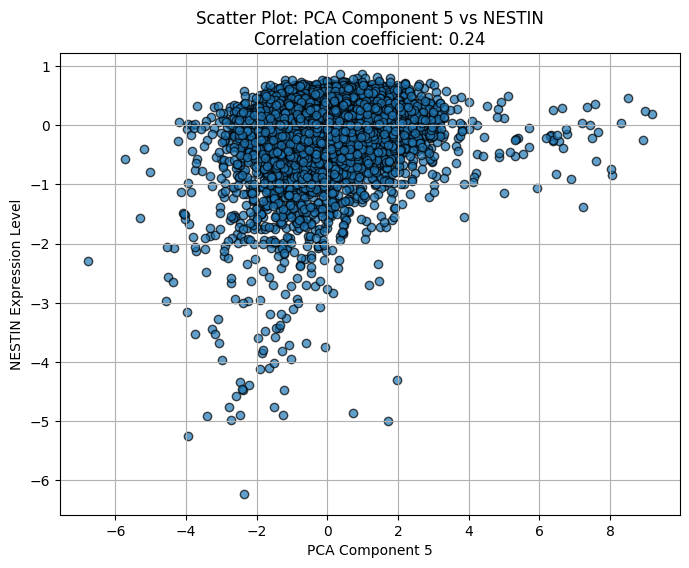

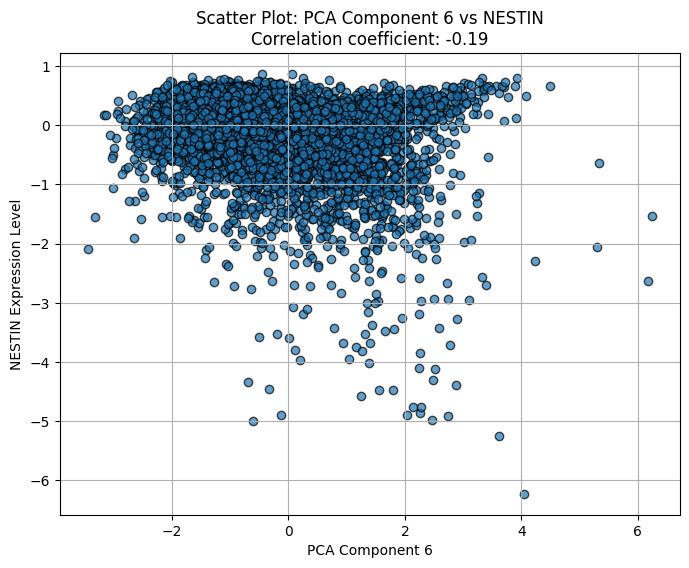

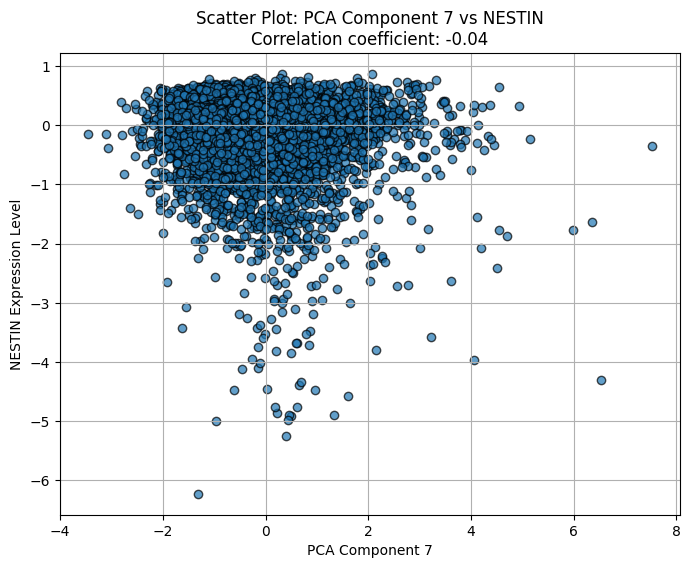

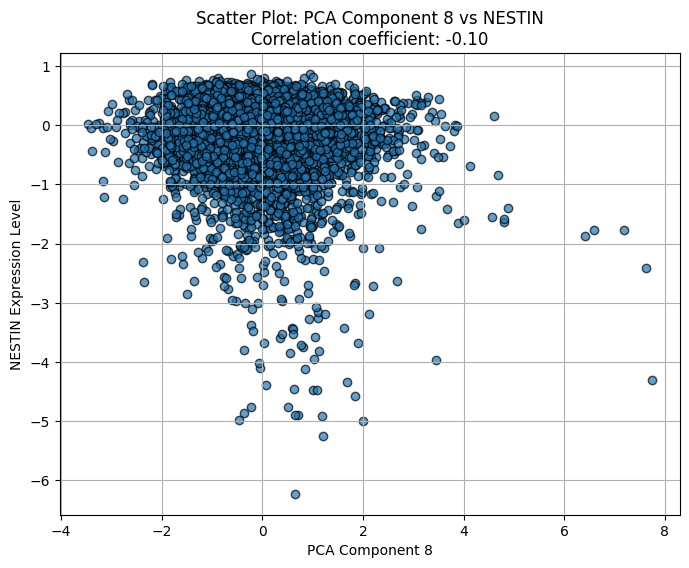

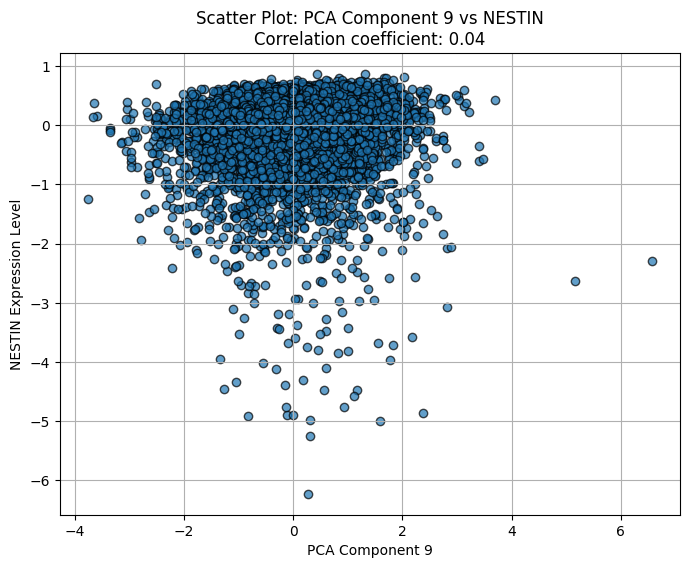

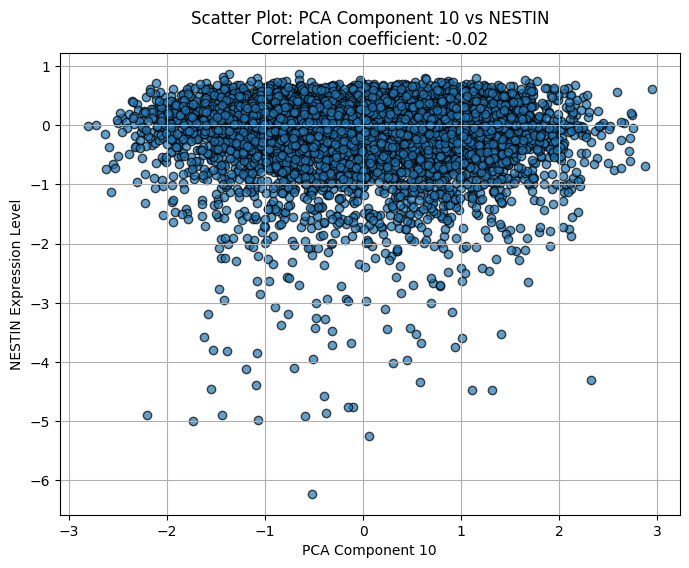

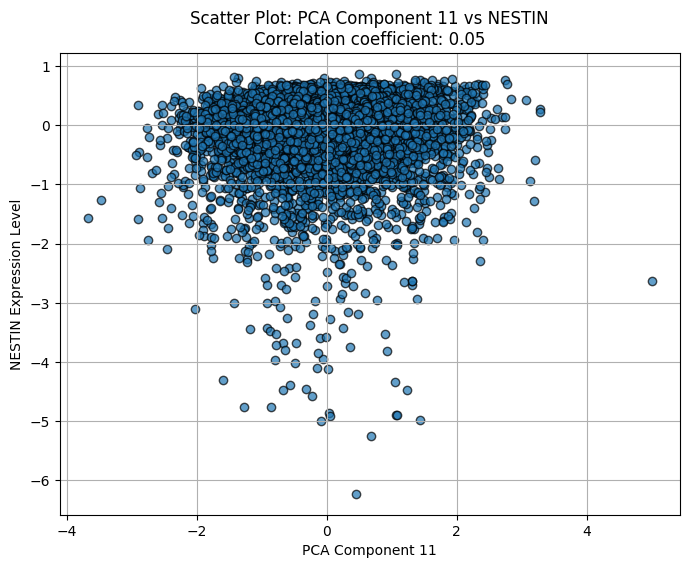

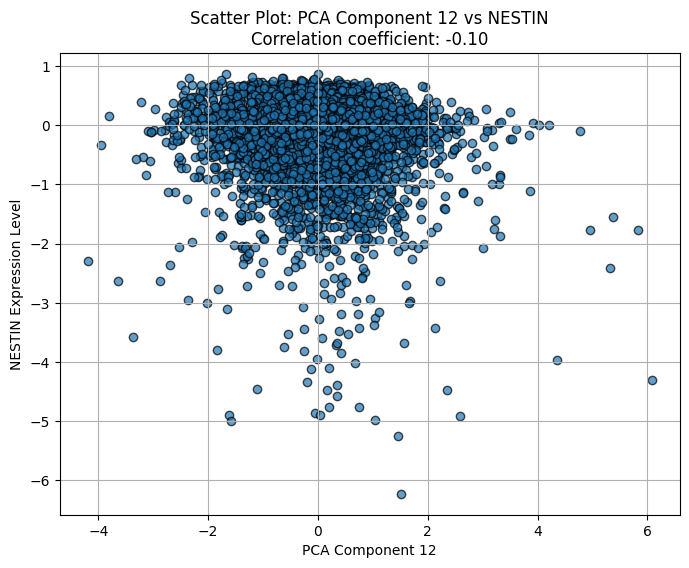

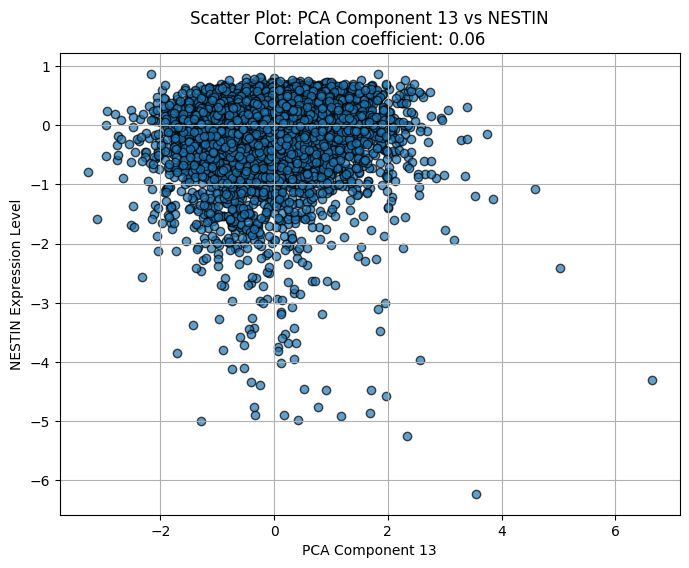

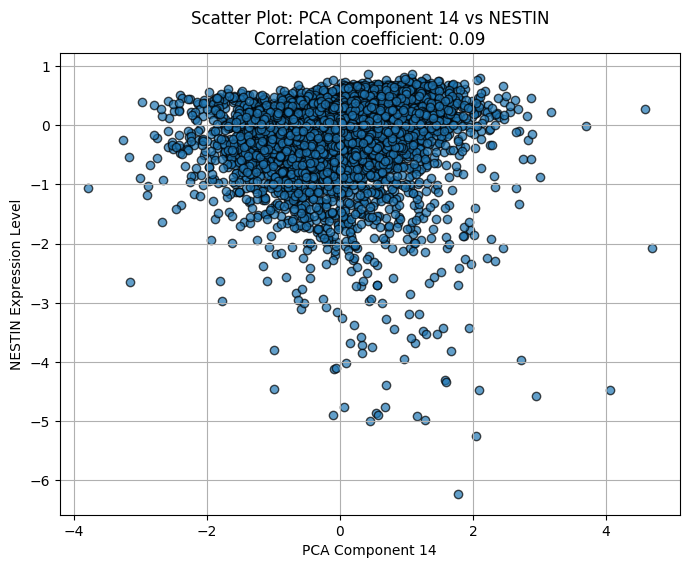

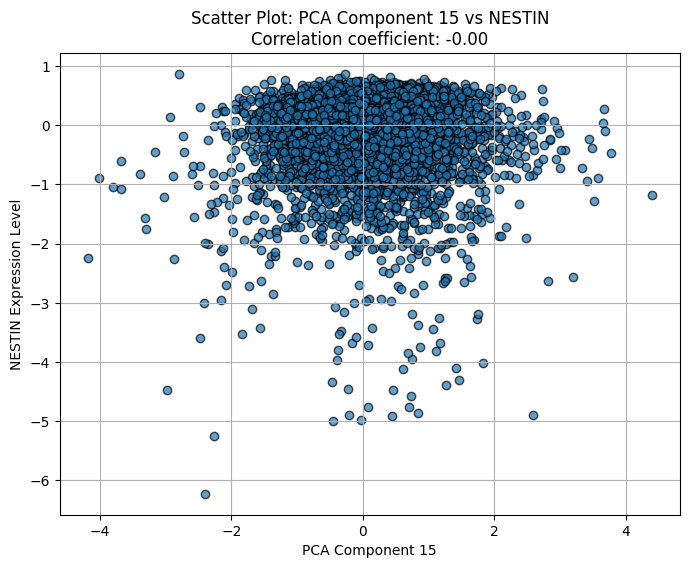

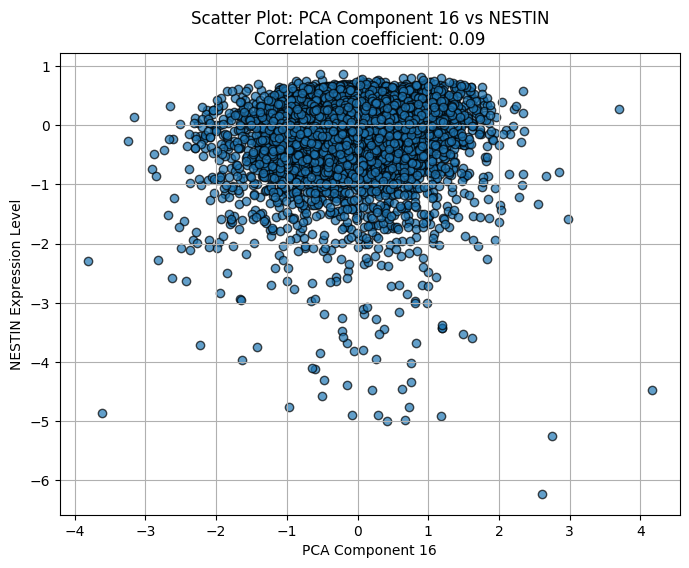

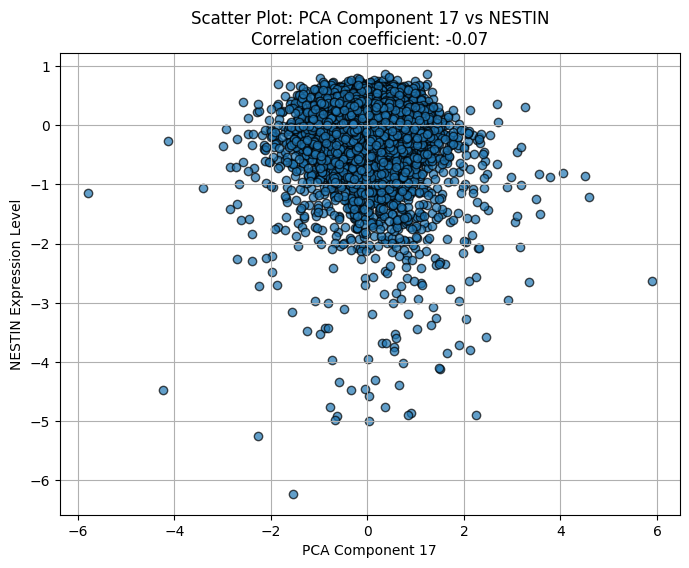

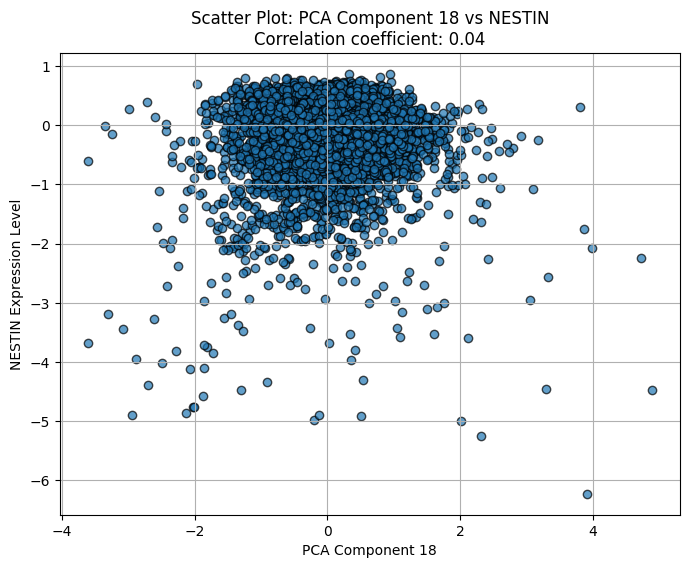

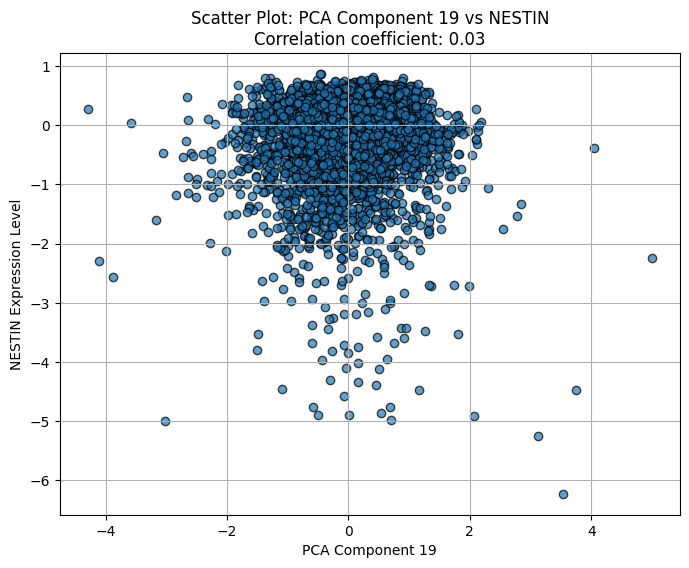

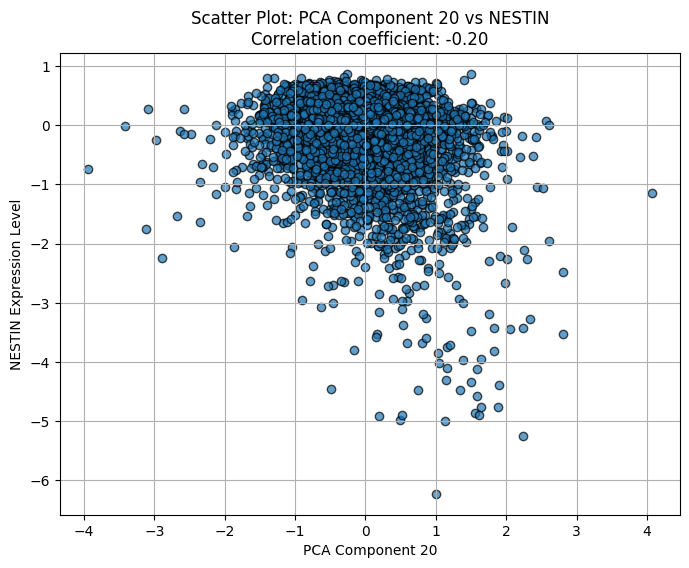

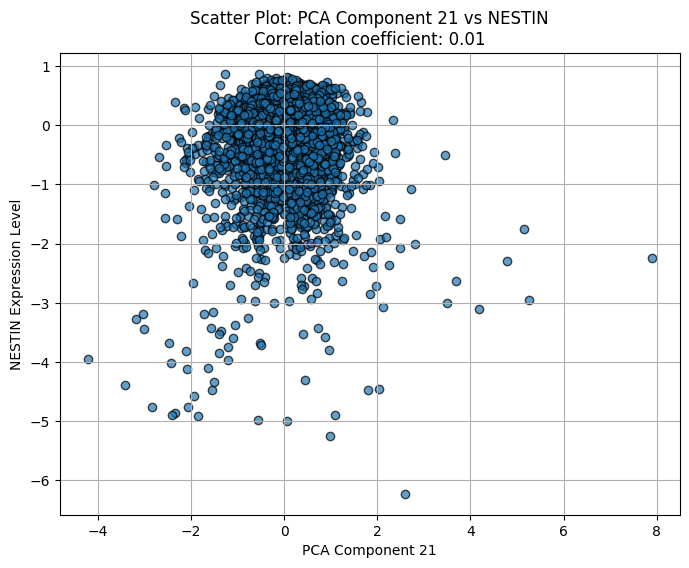

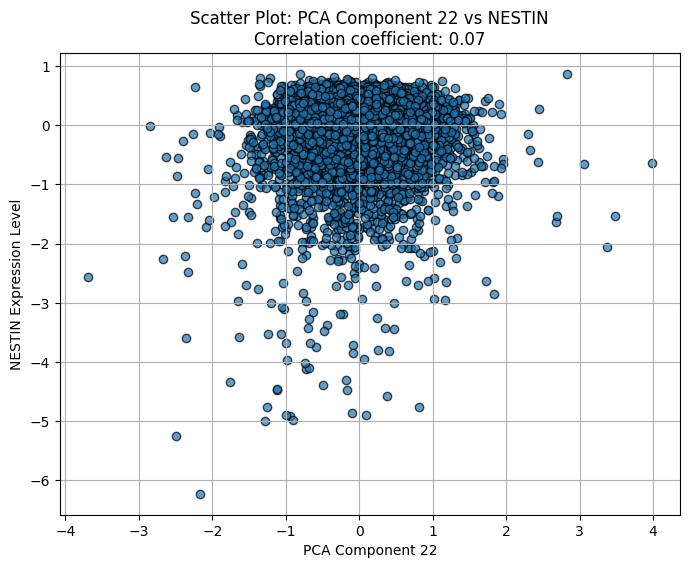

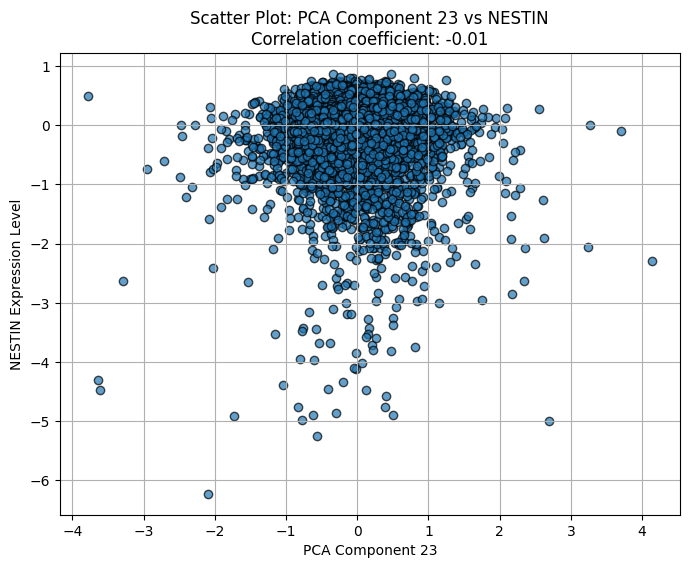

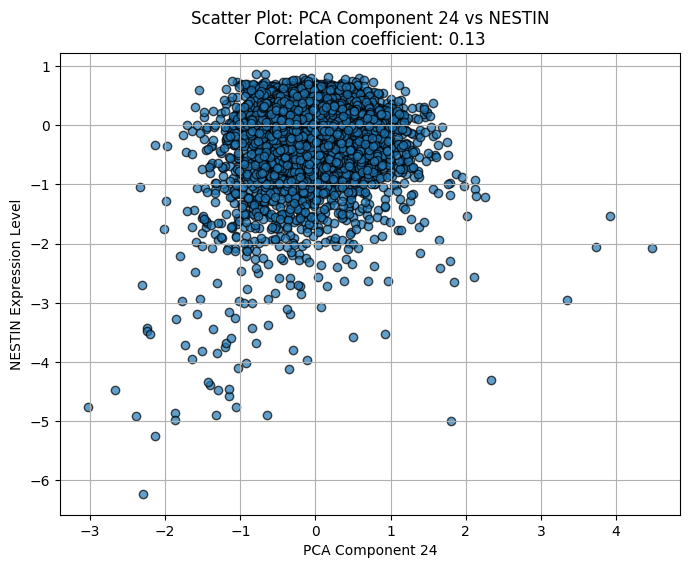

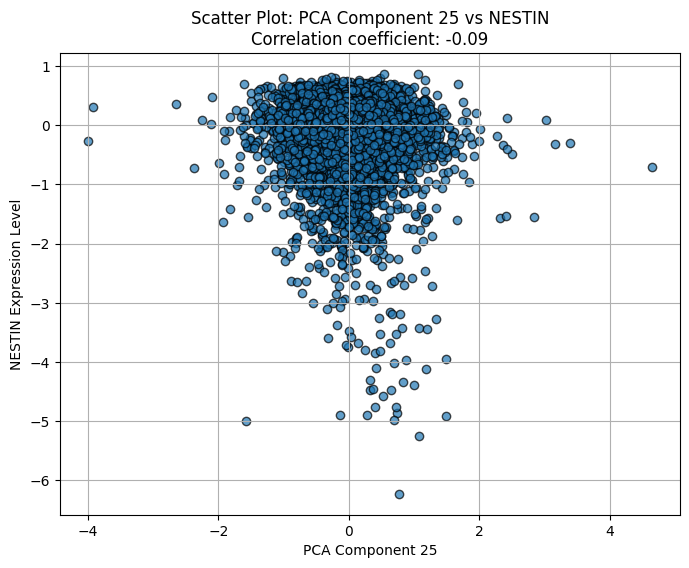

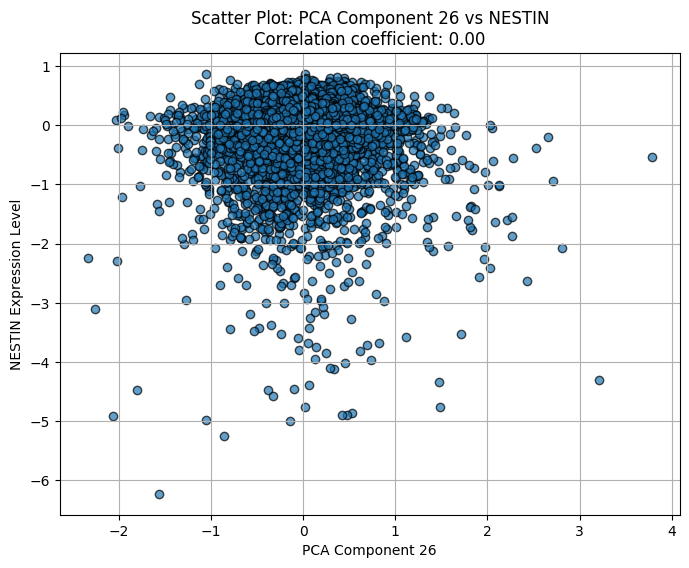

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_pca)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output metrics
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Scatter plots for each PCA feature against 'NESTIN'
for i in range(X_train_pca.shape[1]):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train_pca[:, i], y_train, edgecolor='k', alpha=0.7)
    corr_coef = pearsonr(X_train_pca[:, i], y_train)[0]
    plt.title(f'Scatter Plot: PCA Component {i+1} vs NESTIN\nCorrelation coefficient: {corr_coef:.2f}')
    plt.xlabel(f'PCA Component {i+1}')
    plt.ylabel('NESTIN Expression Level')
    plt.grid(True)
    plt.show()

**(b) GLCM**

In [ ]:
from skimage.color import rgb2gray


In [ ]:
training_df_numeric.to_csv('data_training.csv',index=True)

In [ ]:
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
import glob
from skimage import io
import numpy as np

# Lists to store GLCM features
contrast_list, dissimilarity_list, homogeneity_list, energy_list, correlation_list = [], [], [], [], []
image_ids_filtered = []


def calculate_glcm_properties(image):

    image_gray = rgb2gray(image)

    glcm = greycomatrix((image_gray * 255).astype('uint8'), distances=[1], angles=[0], symmetric=True, normed=True)
    # Calculating GLCM properties
    contrast = greycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
    energy = greycoprops(glcm, 'energy')[0, 0]
    correlation = greycoprops(glcm, 'correlation')[0, 0]

    return contrast, dissimilarity, homogeneity, energy, correlation


filtered_image_ids = df.index[df.index.str.startswith(('A1', 'B1', 'D1'))]

for image_id in filtered_image_ids:
    image_file = f"{image_folder}{image_id}.png"
    matched_files = glob.glob(image_file)
    if matched_files:
        image = io.imread(matched_files[0])

        # Converting to RGB if the image is RGBA
        if image.ndim == 3 and image.shape[2] == 4:
            image = image[:, :, :3]

        # Calculating GLCM properties
        contrast, dissimilarity, homogeneity, energy, correlation = calculate_glcm_properties(image)

        # Storing the properties in their respective lists
        contrast_list.append(contrast)
        dissimilarity_list.append(dissimilarity)
        homogeneity_list.append(homogeneity)
        energy_list.append(energy)
        correlation_list.append(correlation)
        image_ids_filtered.append(image_id)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

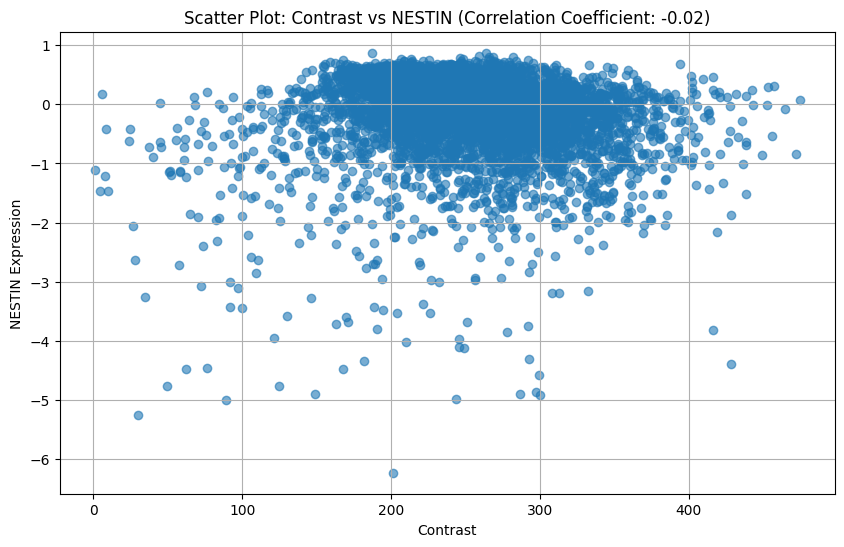

Correlation coefficient between Contrast and NESTIN: -0.02


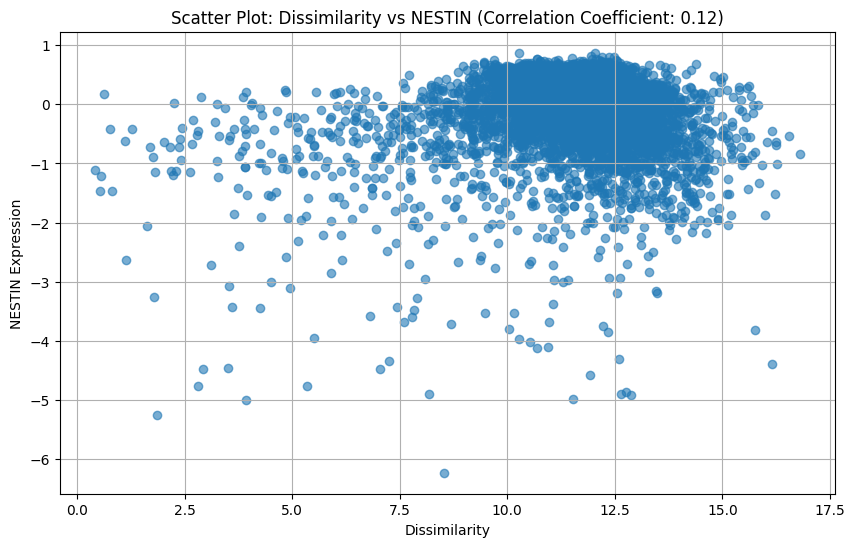

Correlation coefficient between Dissimilarity and NESTIN: 0.12


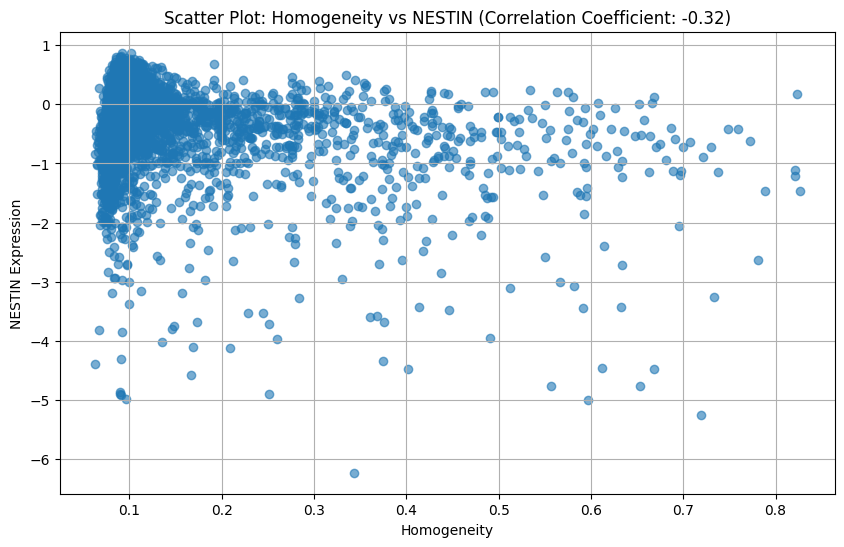

Correlation coefficient between Homogeneity and NESTIN: -0.32


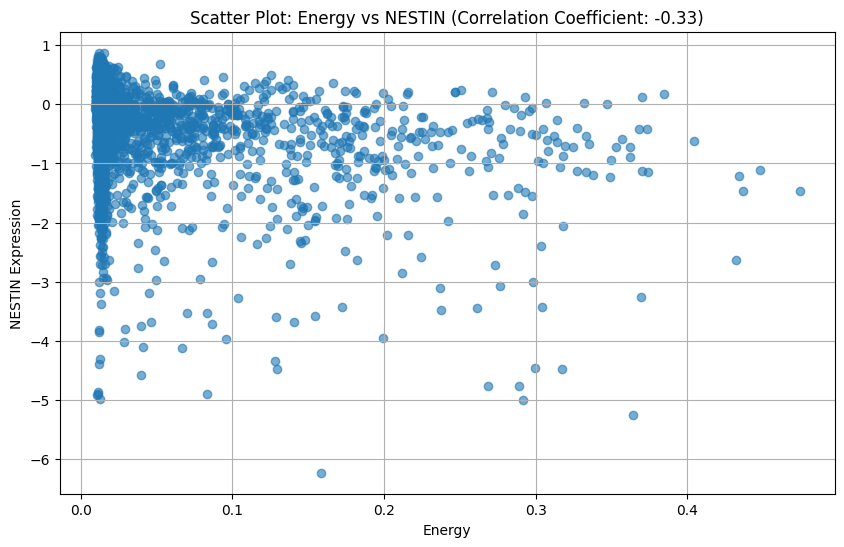

Correlation coefficient between Energy and NESTIN: -0.33


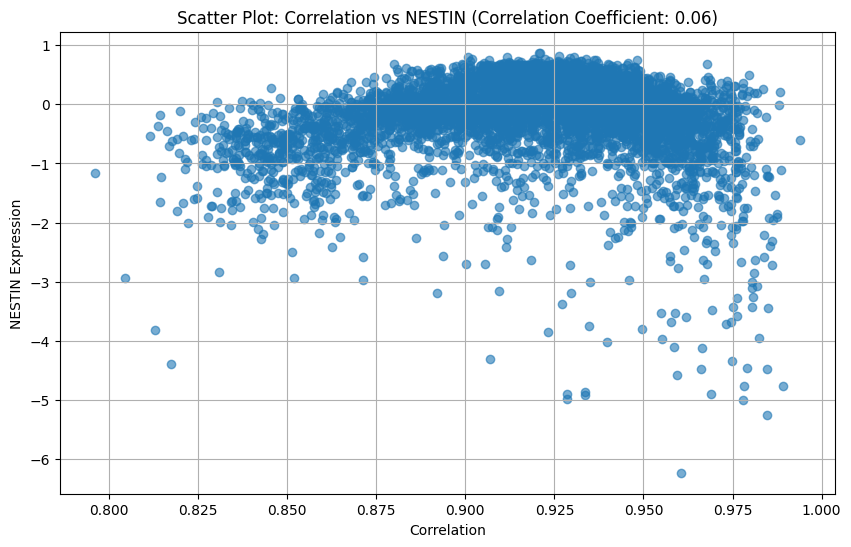

Correlation coefficient between Correlation and NESTIN: 0.06


In [ ]:
nestin_values = training_df_numeric['NESTIN']
glcm_features = [contrast_list, dissimilarity_list, homogeneity_list, energy_list, correlation_list]
glcm_feature_names = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']

for feature, name in zip(glcm_features, glcm_feature_names):

    corr_coef, _ = pearsonr(feature, nestin_values)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(feature, nestin_values, alpha=0.6)
    plt.title(f'Scatter Plot: {name} vs NESTIN (Correlation Coefficient: {corr_coef:.2f})')
    plt.xlabel(name)
    plt.ylabel('NESTIN Expression')
    plt.grid(True)
    plt.show()

    print(f"Correlation coefficient between {name} and NESTIN: {corr_coef:.2f}")

In [ ]:
len(contrast_list)

5792

**Based on the correlation coefficients between the GLCM features and 'NESTIN', here's a brief analysis:**

**Contrast (-0.02) and Correlation (0.06) show very weak linear relationships with 'NESTIN'. This suggests that these features may not be very predictive of 'NESTIN' on their own.
Dissimilarity (0.12) shows a slightly positive but still weak relationship with 'NESTIN', indicating a marginal linear association.
Homogeneity (-0.32) and Energy (-0.33) exhibit moderate negative correlations with 'NESTIN'. These are the strongest relationships observed among the GLCM features, suggesting that they might have more predictive power for 'NESTIN' expression compared to the others.
Given these results, Homogeneity and Energy appear to be the most relevant GLCM features for predicting 'NESTIN'. The negative correlation implies that as Homogeneity and Energy increase, 'NESTIN' expression tends to decrease, and vice versa.**

In [ ]:
#ols regression check

**(c) APPLYING TRANSFER LEARNING TECHNIQUES TO IDENTIFY WHICH FEATURES COULD BE BETTER AND WHICH WON'T BE**

In [ ]:
from PIL import Image
from torchvision import transforms, models
import torch
import os
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and it's already loaded
image_folder_path = '/content/az/patches_256/'

# Define a transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
model = models.resnet50(pretrained=True)
model.eval()  # Set to evaluation mode
# Remove the last layer to get embeddings
model = torch.nn.Sequential(*list(model.children())[:-1])

def extract_features(images):
    with torch.no_grad():
        features = model(images)
    return features.view(features.size(0), -1)

def save_extracted_features(image_ids, image_folder_path, batch_size=100):
    for i in range(0, len(image_ids), batch_size):
        batch_image_ids = image_ids[i:i+batch_size]
        images_batch = []
        for image_id in batch_image_ids:
            image_path = os.path.join(image_folder_path, f'{image_id}.png')
            with Image.open(image_path).convert('RGB') as img:
                img_t = transform(img)
                images_batch.append(img_t.unsqueeze(0))  # Add batch dimension
        images_batch = torch.cat(images_batch)  # Concatenate to a single tensor
        features = extract_features(images_batch).numpy()  # Extract features and convert to NumPy

        # Save the batch of features
        with open(f'features_batch_{i//batch_size+1}.pkl', 'wb') as f:
            pickle.dump(features, f)
        print(f'Batch {i//batch_size+1} saved.')

# Assuming 'image_ids' is already defined as df.index.tolist()
image_ids = training_df.index.tolist()  # Adjust as necessary
save_extracted_features(image_ids, image_folder_path)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Batch 1 saved.
Batch 2 saved.
Batch 3 saved.
Batch 4 saved.
Batch 5 saved.
Batch 6 saved.
Batch 7 saved.
Batch 8 saved.
Batch 9 saved.
Batch 10 saved.
Batch 11 saved.
Batch 12 saved.
Batch 13 saved.
Batch 14 saved.
Batch 15 saved.
Batch 16 saved.
Batch 17 saved.
Batch 18 saved.
Batch 19 saved.
Batch 20 saved.
Batch 21 saved.
Batch 22 saved.
Batch 23 saved.
Batch 24 saved.
Batch 25 saved.
Batch 26 saved.
Batch 27 saved.
Batch 28 saved.
Batch 29 saved.
Batch 30 saved.
Batch 31 saved.
Batch 32 saved.
Batch 33 saved.
Batch 34 saved.
Batch 35 saved.
Batch 36 saved.
Batch 37 saved.
Batch 38 saved.
Batch 39 saved.
Batch 40 saved.
Batch 41 saved.
Batch 42 saved.
Batch 43 saved.
Batch 44 saved.
Batch 45 saved.
Batch 46 saved.
Batch 47 saved.
Batch 48 saved.
Batch 49 saved.
Batch 50 saved.
Batch 51 saved.
Batch 52 saved.
Batch 53 saved.
Batch 54 saved.
Batch 55 saved.
Batch 56 saved.
Batch 57 saved.
Batch 58 saved.


In [ ]:
def load_features_from_pickle(number_of_batches):
    all_features = []
    for i in range(1, number_of_batches + 1):
        with open(f'features_batch_{i}.pkl', 'rb') as f:
            batch_features = pickle.load(f)
            all_features.append(batch_features)
    return np.vstack(all_features)

number_of_batches = len(image_ids) // 100 + (1 if len(image_ids) % 100 != 0 else 0)
features = load_features_from_pickle(number_of_batches)

In [ ]:
y = training_df['NESTIN'].values  # Adjust if your target variable is different

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

predictions = reg.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 0.6201354751858561
R^2 Score: 0.04595290556900122


**PLOTTING SCATTER PLOTS BETWEEN TRANSFER LEARNING FEATURES AND 'NESTIN' HERE**

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming features is your features array and it's already in the correct format
# If features is not a DataFrame, you might convert it back for ease of plotting
features_df = pd.DataFrame(X_train, columns=[f'Feature {i}' for i in range(X_train.shape[1])])

# Plotting
for feature in features_df.columns:
    correlation, _ = pearsonr(features_df[feature], y_train)
    plt.figure(figsize=(6, 4))
    plt.scatter(features_df[feature], y_train, alpha=0.5)
    plt.title(f'{feature} vs. NESTIN\nCorrelation: {correlation:.2f}')
    plt.xlabel(feature)
    plt.ylabel('NESTIN')
    plt.grid(True)
    plt.show()

 **SINCE AFTER COMPARING MULTIPLE FEATURES AND CORRELATIONS ,PCA WAS SELECTED TO GIVE GREAT FEATURES THAT IS 26 COMPONENTS . AFTER APPLYING GLCM ,HOMOGENEITY AND ENERGY ALSO CORRELATED WITH 'NESTIN' TO SOME EXTENT**

**(II)**

**ii) [20 Marks]
Apply the following regression models using the features from Q2(i):
Ordinary Least Squares (OLS) Regression or Multi-layer Perceptron (MLP) (your choice!)
Support Vector Regression (SVR)
For each model, create scatter plots to compare the true and predicted values on the test data. Additionally, evaluate and report your models' performance using the following metrics: RMSE, Pearson Correlation Coefficient, Spearman Correlation Coefficient, and R2 score. Reference for metrics: sklearn.metrics.**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predicting the target variable for the testing set
y_pred = lr_model.predict(X_test_scaled)

# Calculating performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Square Error): {rmse}")
print(f"R^2 Score: {r2}")

RMSE (Root Mean Square Error): 0.448151843751993
R^2 Score: 0.5415013926492607


In [ ]:
#OLS REGRESSION PCA


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_pca)

# Calculate metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

OLS Regression Metrics:
RMSE: 0.4975
R² Score: 0.4349
Pearson Correlation Coefficient: 0.6659
Spearman Correlation Coefficient: 0.6860


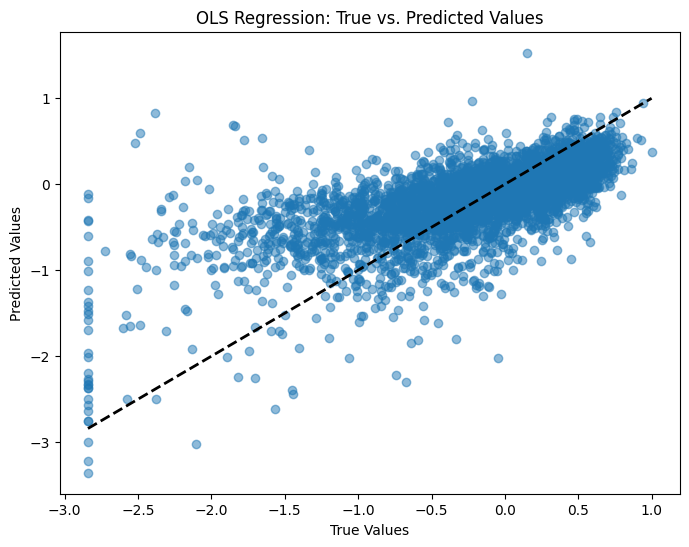

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation Coefficient
pearson_corr, _ = pearsonr(y_test, y_pred)

# Spearman Correlation Coefficient
spearman_corr, _ = spearmanr(y_test, y_pred)

# Printing Metrics
print(f'OLS Regression Metrics:')
print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')
print(f'Pearson Correlation Coefficient: {pearson_corr:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr:.4f}')

# Scatter Plot for True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('OLS Regression: True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()


SVR Metrics:
RMSE: 0.5125
R² Score: 0.4004
Pearson Correlation Coefficient: 0.6581
Spearman Correlation Coefficient: 0.6582


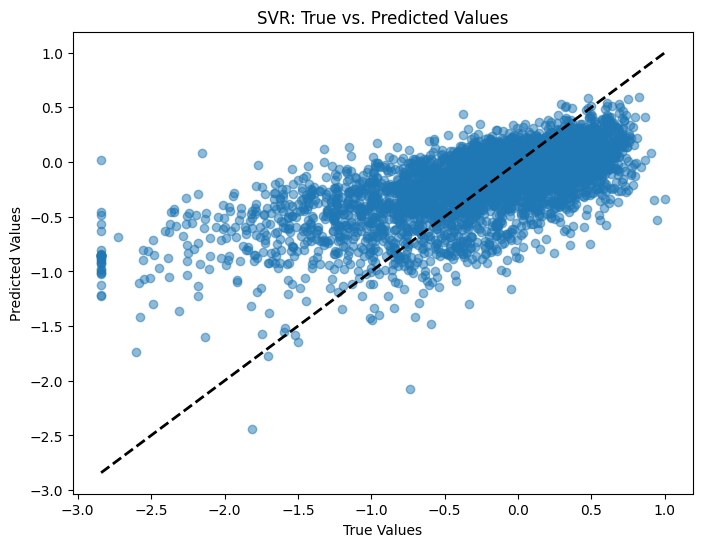

In [ ]:
from sklearn.svm import SVR

# Training SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test_pca)

# Calculate metrics for SVR
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)
pearson_corr_svr, _ = pearsonr(y_test, y_pred_svr)
spearman_corr_svr, _ = spearmanr(y_test, y_pred_svr)

# Printing Metrics
print(f'\nSVR Metrics:')
print(f'RMSE: {rmse_svr:.4f}')
print(f'R² Score: {r2_svr:.4f}')
print(f'Pearson Correlation Coefficient: {pearson_corr_svr:.4f}')
print(f'Spearman Correlation Coefficient: {spearman_corr_svr:.4f}')

# Scatter Plot for True vs. Predicted Values for SVR
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('SVR: True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.show()

**Question No. 3 (Using Convolutional Neural Networks) [45 Marks]
(i) [20 Marks]
Develop a Convolutional Neural Network (CNN) using PyTorch to predict the expression level of NESTIN from input images, following the approach outlined in part (ii) of Question (2). Design the architecture of the CNN to input an image and output a single value representing the NESTIN expression level. You have the freedom to select the structure of the network and the loss functions to be used.  You can use pre-trained models and perform transfer learning if needed.
Evaluate your model's performance on the test dataset by creating a scatter plot that compares the true vs. predicted NESTIN expression values. Additionally, quantify your model's accuracy using the following metrics:
RMSE (Root Mean Square Error)
Pearson Correlation Coefficient
Spearman Correlation Coefficient
R2 score
Your model will be assessed based on its architecture design and the achieved performance metrics. Aim for the best possible performance on the test set, ensuring that the test data is not used during training. Include in your submission convergence plots that illustrate the change in loss across training epochs, demonstrating how your model's performance improves over time.**


**ANSWER 3 (i)**

In [ ]:
training_df_numeric.head(2)

Unnamed: 0  Location_Center_Y  Location_Center_X      SMAa  \
image_id                                                               
A1_0x40          412         764.003658         247.700528 -2.895476   
A1_0x42         7325         799.511111         184.389514 -2.895476   

             CD11b      CD44      CD31      CDK4     YKL40     CD11c  ...  \
image_id                                                              ...   
A1_0x40  -1.445686 -1.875972 -3.456108  0.461409 -0.437137 -1.256610  ...   
A1_0x42  -1.198798 -2.070174 -3.456108 -0.002521 -0.501450 -0.673677  ...   

            PDGFRa      MCT4      DNA1      DNA3      MHCI      CD68  \
image_id                                                               
A1_0x40   0.062324  0.225897  0.935612  0.924488  0.015759 -0.587511   
A1_0x42  -0.125199  0.367023 -0.089621 -0.068379  0.073487 -0.884354   

              CD14      KI67      CD16     SOX10  
image_id                                          
A1_0x40  -1.114721 -3.156091 -1.136758  0.748695  
A1_0x42  -1.221040 -3.156091 -0.501517 -0.556429  

[2 rows x 41 columns]

**CONVERTTING THE DATAFRAMES INTO TEST , VALIDATION AND TEST SET , ALSO DROPPING CATEGORICAL COLUMNS AND ONLY PUTTING NUMERICAL ONES.**

In [ ]:
train_mask = df['specimen_id'].str.startswith(('A1', 'D1'))
val_mask = df['specimen_id'].str.startswith('B1')
test_mask = df['specimen_id'].str.startswith('C1')

training_df = df[train_mask]
validation_df = df[val_mask]
testing_df = df[test_mask]


print("Training DataFrame size:", training_df.shape)
print("Validation DataFrame size:", validation_df.shape)
print("Testing DataFrame size:", testing_df.shape)

Training DataFrame size: (4647, 44)
Validation DataFrame size: (1145, 44)
Testing DataFrame size: (4129, 44)


In [ ]:
training_df_numeric = training_df.select_dtypes(include=[np.number])
validation_df_numeric = validation_df.select_dtypes(include=[np.number])
testing_df_numeric = testing_df.select_dtypes(include=[np.number])
print("Numeric Training DataFrame shape:", training_df_numeric.shape)
print("Numeric Validation DataFrame shape:", validation_df_numeric.shape)
print("Numeric Testing DataFrame shape:", testing_df_numeric.shape)
print("Numeric columns in Training DataFrame:", training_df_numeric.columns.tolist())

Numeric Training DataFrame shape: (4647, 41)
Numeric Validation DataFrame shape: (1145, 41)
Numeric Testing DataFrame shape: (4129, 41)
Numeric columns in Training DataFrame: ['Unnamed: 0', 'Location_Center_Y', 'Location_Center_X', 'SMAa', 'CD11b', 'CD44', 'CD31', 'CDK4', 'YKL40', 'CD11c', 'HIF1a', 'CD24', 'TMEM119', 'OLIG2', 'GFAP', 'VISTA', 'IBA1', 'CD206', 'PTEN', 'NESTIN', 'TCIRG1', 'CD74', 'MET', 'P2RY12', 'CD163', 'S100B', 'cMYC', 'pERK', 'EGFR', 'SOX2', 'HLADR', 'PDGFRa', 'MCT4', 'DNA1', 'DNA3', 'MHCI', 'CD68', 'CD14', 'KI67', 'CD16', 'SOX10']


**IMPORTING DEPENDENCIES**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

**CREATING PROTEIN EXPRESSION DATASET CLASS FOR CNN , DATALOADER**

In [ ]:
class ProteinExpressionDataset(Dataset):
    def __init__(self, image_folder, dataframe, transform=None):
        """
        Args:
            image_folder (string): Directory with all the images.
            dataframe (pandas.DataFrame): DataFrame containing 'NESTIN' values indexed by image_id.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.image_folder = image_folder
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_id = self.dataframe.index[idx]
        img_name = os.path.join(self.image_folder, f'{image_id}.png')
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        nestin_value = self.dataframe.loc[image_id, 'NESTIN']
        return image, nestin_value


**CREATING TRAINING , TESTING , VALIDATION DATASETS FOR DATALOADER**

In [ ]:
validation_dataset = ProteinExpressionDataset(
    dataframe=validation_df_numeric,
    image_folder=image_folder_path,
    transform=transform
)

In [ ]:
training_dataset = ProteinExpressionDataset(
    image_folder=image_folder_path,
    dataframe=training_df_numeric,
    transform=transform
)

validation_dataset = ProteinExpressionDataset(
    image_folder=image_folder_path,
    dataframe=validation_df_numeric,
    transform=transform
)

In [ ]:
test_dataset = ProteinExpressionDataset(
    image_folder='/content/az/target_folder',
    dataframe=testing_df_numeric,
    transform=transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
)

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

**CREATING DATALOADERS**

In [ ]:
train_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [ ]:
val_protein_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)


In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


**USING A PRETRAINED MODEL FOR REGRESSION TRAINING**

In [ ]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**CONVERGENCE PLOT THAT DEPICTS CHANGES IN TRAINING LOSS WITH TIME AND THEIR VALUES**

In [ ]:
num_epochs = 10
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device).float(), targets.to(device).unsqueeze(1).float()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_training_loss = running_loss / len(train_loader.dataset)
    training_losses.append(epoch_training_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device).float(), targets.to(device).unsqueeze(1).float()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
    epoch_validation_loss = running_loss / len(val_protein_dataloader.dataset)
    validation_losses.append(epoch_validation_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_training_loss:.4f}, Validation Loss: {epoch_validation_loss:.4f}')



Epoch [1/10], Training Loss: 0.4095, Validation Loss: 0.2180
Epoch [2/10], Training Loss: 0.2629, Validation Loss: 0.2107
Epoch [3/10], Training Loss: 0.2465, Validation Loss: 0.2866
Epoch [4/10], Training Loss: 0.2361, Validation Loss: 0.2056
Epoch [5/10], Training Loss: 0.2146, Validation Loss: 0.1775
Epoch [6/10], Training Loss: 0.1884, Validation Loss: 0.3293
Epoch [7/10], Training Loss: 0.2057, Validation Loss: 0.2892
Epoch [8/10], Training Loss: 0.1422, Validation Loss: 0.2261
Epoch [9/10], Training Loss: 0.1042, Validation Loss: 0.2489
Epoch [10/10], Training Loss: 0.0835, Validation Loss: 0.2648


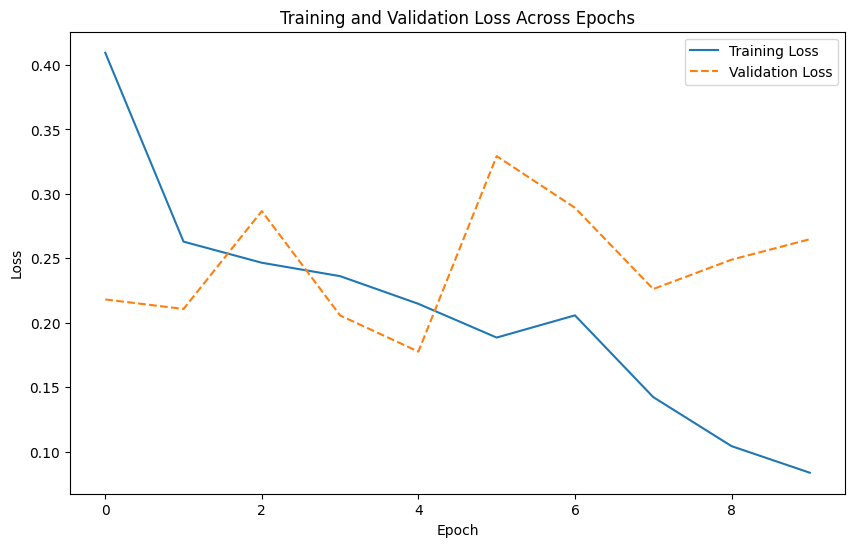

In [ ]:
# Plotting the convergence
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()
plt.show()

**MODEL EVALUATION**

In [ ]:
model.eval()
predictions = []
actuals = []
with torch.no_grad():
    for inputs, targets in test_dataloader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(targets.numpy())
# Converting to NumPy arrays for calculation
actuals = np.array(actuals).flatten()
predictions = np.array(predictions).flatten()

# Calculating metrics
rmse = np.sqrt(mean_squared_error(actuals, predictions))
pearson_corr, _ = pearsonr(actuals, predictions)
spearman_corr, _ = spearmanr(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'RMSE: {rmse:.4f}, Pearson Correlation: {pearson_corr:.4f}, Spearman Correlation: {spearman_corr:.4f}, R^2 Score: {r2:.4f}')

RMSE: 0.6156, Pearson Correlation: 0.4899, Spearman Correlation: 0.5427, R^2 Score: 0.1349


**RMSE of 0.6156 indicates moderate prediction errors, suggesting room for model improvement.
Pearson Coefficient of 0.4899 shows a moderate positive linear relationship between actual and predicted values.
Spearman Coefficient of 0.5427 reveals a moderate monotonic relationship, indicating predictions generally align with actual trends.
R^2 Score of 0.1349 is low, highlighting that the model explains a small portion of the variance in 'NESTIN' levels.**

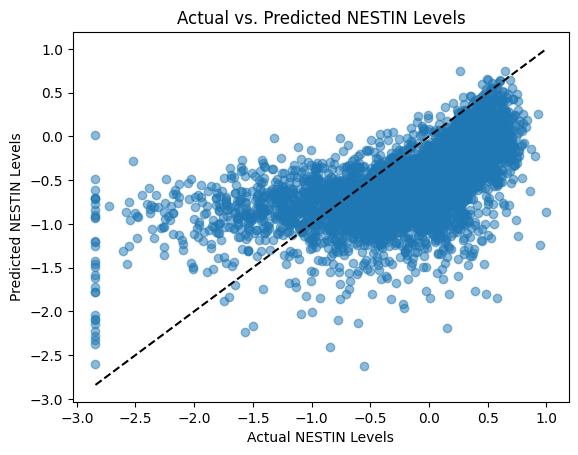

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(actuals, predictions, alpha=0.5)
plt.xlabel('Actual NESTIN Levels')
plt.ylabel('Predicted NESTIN Levels')
plt.title('Actual vs. Predicted NESTIN Levels')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'k--')  # Diagonal line for reference
plt.show()

**ANSWER 3 (II)**

In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import pandas as pd

class ProteinExpressionDataset(Dataset):
    def __init__(self, dataframe, image_folder, transform=None):
        self.dataframe = dataframe
        self.image_folder = image_folder
        self.transform = transform or transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_id = self.dataframe.index[idx]  # Assuming the index of the DataFrame is set to 'image_id'
        img_path = os.path.join(self.image_folder, f"{image_id}.png")
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        targets = row[['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET']].values.astype('float32')
        return image, targets

In [ ]:
import torchvision.models as models
import torch.nn as nn

class MultiOutputResNet(nn.Module):
    def __init__(self, num_proteins=5):
        super(MultiOutputResNet, self).__init__()
        base_model = models.resnet18(pretrained=True)
        num_features = base_model.fc.in_features
        base_model.fc = nn.Identity()  # Remove the original fully connected layer
        self.base_model = base_model
        self.fc = nn.Linear(num_features, num_proteins)

    def forward(self, x):
        x = self.base_model(x)
        x = self.fc(x)
        return x

In [ ]:
# Assuming 'df' is your original DataFrame and contains a column 'specimen_id'
test_df = df[df['specimen_id'].str.startswith('C1')]

# Now, use 'test_df' to create your test dataset and dataloader
test_dataset = ProteinExpressionDataset(dataframe=test_df, image_folder='/content/az/target_folder/', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
import numpy as np
import torch.optim as optim
import torch

# Assume df is your dataframe with 'specimen_id' and 'image_id'
groups = df['specimen_id']
logo = LeaveOneGroupOut()

for train_idx, test_idx in logo.split(df, groups=groups):
    train_df = df.iloc[train_idx]
    test_df = df[df['specimen_id'].str.startswith('C1')]
    train_dataset = ProteinExpressionDataset(train_df, image_folder='/content/az/patches_256/')
    test_dataset = ProteinExpressionDataset(test_df, image_folder='/content/az/target_folder/')

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Initialize model, loss function, and optimizer
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = MultiOutputResNet(num_proteins=5).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for images, targets in train_loader:
            images, targets = images.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
    total_val_loss = 0
    predictions, actuals = [], []


    for images, targets in test_loader:
      images, targets = images.to(device), targets.to(device)
      outputs = model(images)
      loss = criterion(outputs, targets)
      total_val_loss += loss.item()

      predictions.append(outputs.detach().cpu().numpy())
      actuals.append(targets.cpu().numpy())



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are depreca

In [ ]:
predictions = np.concatenate(predictions, axis=0)
actuals = np.concatenate(actuals, axis=0)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actuals, predictions, multioutput='raw_values'))
r2 = r2_score(actuals, predictions, multioutput='raw_values')
pearson_corr = [pearsonr(actuals[:, i], predictions[:, i])[0] for i in range(predictions.shape[1])]
spearman_corr = [spearmanr(actuals[:, i], predictions[:, i])[0] for i in range(predictions.shape[1])]

print(f'Validation Loss: {total_val_loss / len(test_loader)}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'Pearson Correlation: {pearson_corr}')
print(f'Spearman Correlation: {spearman_corr}')

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(actuals, predictions, protein_names, specimen_id):
    fig, axs = plt.subplots(1, 5, figsize=(25, 5))
    fig.suptitle(f'Actual vs. Predicted Protein Expression Levels ({specimen_id})')

    for i, protein_name in enumerate(protein_names):
        axs[i].scatter(actuals[:, i], predictions[:, i], alpha=0.5)
        axs[i].plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], 'k--', lw=2)
        axs[i].set_title(protein_name)
        axs[i].set_xlabel('Actual')
        axs[i].set_ylabel('Predicted')

    plt.show()

# Example usage after completing a fold
plot_predictions(actuals, predictions, ['EGFR', 'PTEN', 'NESTIN', 'SOX2', 'MET'], 'Specimen_X')